In [32]:
# The code used connectome analysis for "Syed Durafshan Sakeena, Ravbar Primoz, Simpson Julie H (2025), Inhibitory circuits control leg movements during Drosophila grooming eLife 14:RP106446"

#Code written by Durafshan Sakeena Syed 

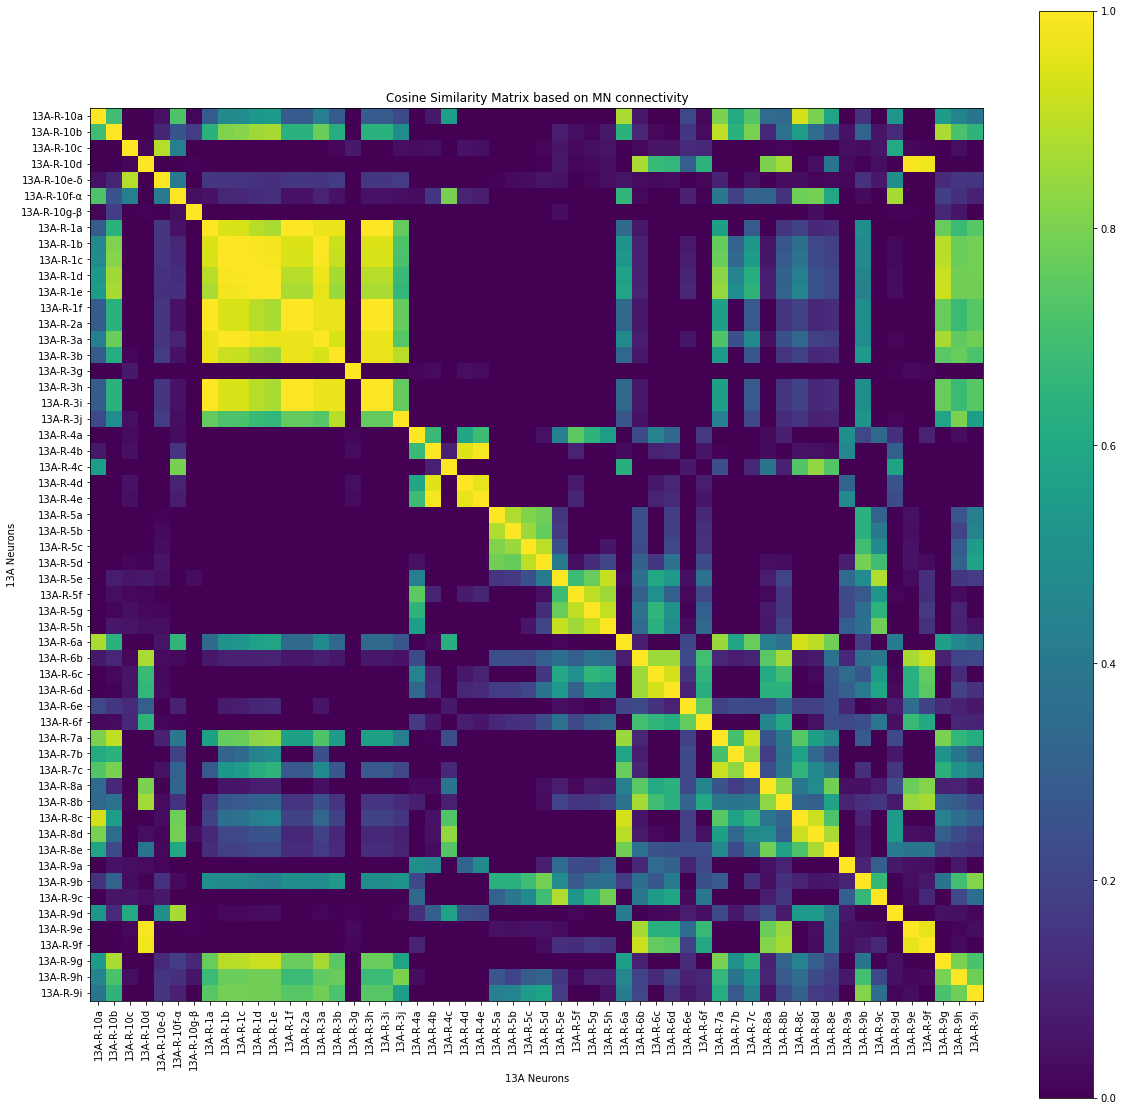

In [17]:
# Cosine similarity based on  downstream MN connections # 13AR #12-12-23
#plt.rcParams.update({'font.size': 25})

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/R13A_D_MNs.csv')

#new file name = Fig2_13A (RIGHT) _DOWNSTREAM MOTOR NEURONS.csv

# Rename the column
df = df.rename(columns={'13A': 'names'})

# Define the mappings
mappings = {
    '13A-R-α-10f': '13A-R-10f-α',
    '13A-R-δ-10e': '13A-R-10e-δ',
    '13A-R-β-10g': '13A-R-10g-β'
}

# Replace values in the 'names' column
df['names'] = df['names'].replace(mappings)


# Now the "13A" column is renamed to "names"

# Use pivot_table with aggregation (sum) to handle duplicates
pivot_df = df.pivot_table(index='names', columns='post_id', values='weight', aggfunc=np.sum, fill_value=0)

# Compute the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(pivot_df)

# Visualize the cosine similarity matrix using Matplotlib
plt.imshow(cosine_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(pivot_df.index)), pivot_df.index, rotation='vertical')
plt.yticks(range(len(pivot_df.index)), pivot_df.index)
plt.xlabel('13A Neurons')
plt.ylabel('13A Neurons')
plt.title('Cosine Similarity Matrix based on MN connectivity')

#plt.savefig('/Users/Syed/Desktop/pri13AL_circuit/Figures/Cosine Similarity Matrix based on 13A-MN connectivity_12-11-23.tiff', format='tiff', bbox_inches='tight')

plt.gcf().set_size_inches(20, 20)
plt.show()


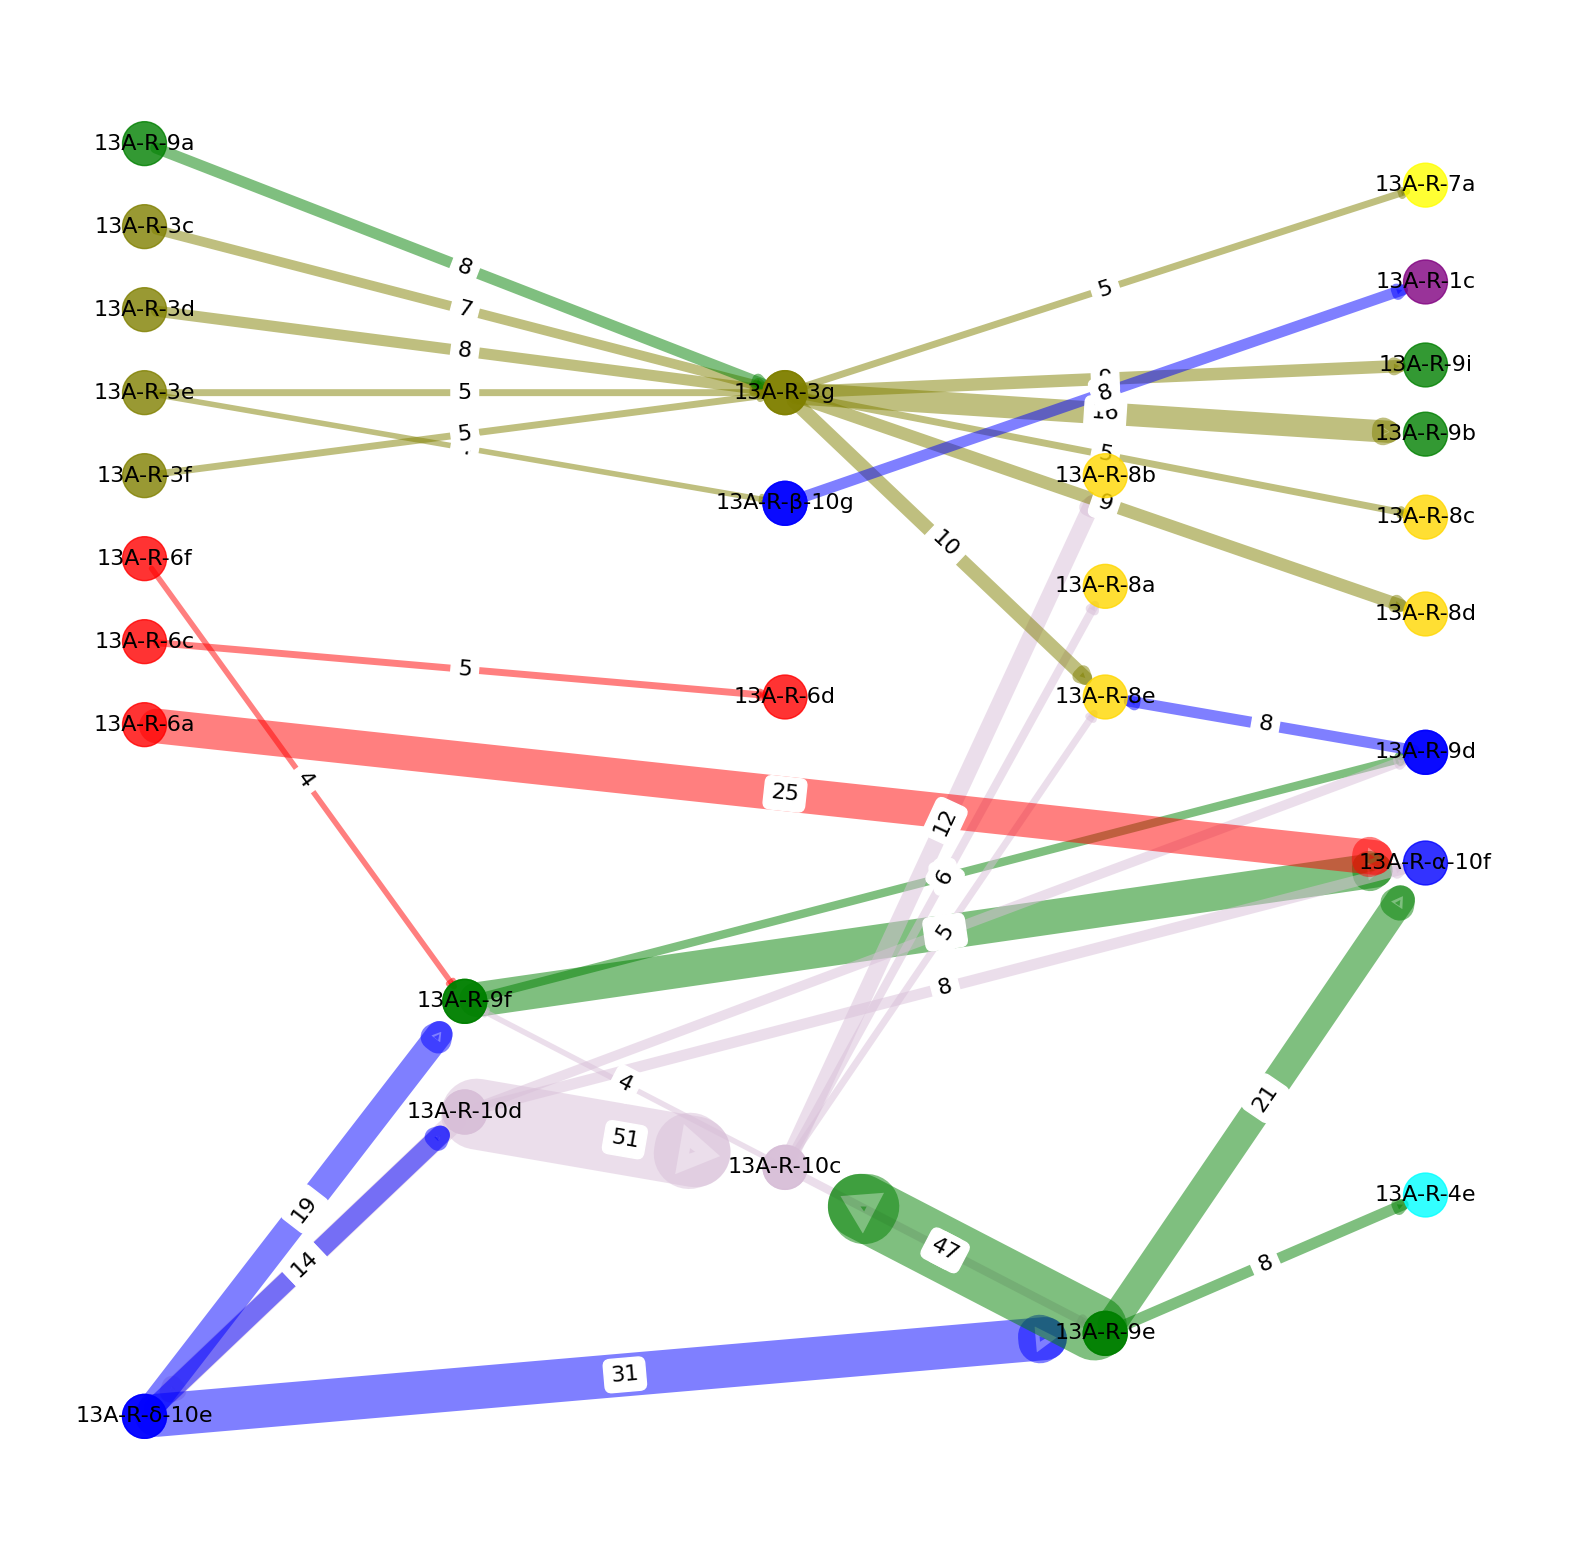

In [424]:
# 13A-13A connections

import matplotlib.pyplot as plt
import networkx as nx


df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13AR/Dec23/R13A_D_13A.csv')

#new filename = Fig 3—figure supplement 1_13A_DOWNSTREAM 13A (RIGHT).csv


df = df.rename(columns={'names': 'presynaptic', 'names.y': 'postsynaptic'})

pre13A = df['presynaptic'].unique().tolist()
post13A = df['postsynaptic'].unique().tolist()
                  

G = nx.DiGraph()
G.add_nodes_from(pre13A)
G.add_nodes_from(post13A)

for i in range(len(df)):
    G.add_edge(df.iloc[i]['presynaptic'], df.iloc[i]['postsynaptic'], weight=df.iloc[i]['weight'])

pre13A_sorted = sorted(pre13A)
post13A_sorted = sorted(post13A)


colors_13A = {
   "13A-R-1a": "purple",
    "13A-R-1b": "purple",
    "13A-R-1c": "purple",
    "13A-R-1d": "purple",
    "13A-R-1e": "purple",
    "13A-R-1f": "purple",
    "13A-R-2a":"violet",
    "13A-R-2b":"violet",
    "13A-R-3a": "Olive",
    "13A-R-3b": "Olive",
    "13A-R-3c": "Olive",
    "13A-R-3d": "Olive",
    "13A-R-3e": "Olive",
    "13A-R-3f": "Olive",
    "13A-R-3g": "Olive",
    "13A-R-3h": "Olive",
    "13A-R-3i": "Olive",
    "13A-R-3j": "Olive",
    "13A-R-4a": "cyan",
    "13A-R-4b": "cyan",
    "13A-R-4c": "cyan",
    "13A-R-4d": "cyan",
    "13A-R-4e": "cyan",
    "13A-R-5a": "orange",
    "13A-R-5b": "orange",
    "13A-R-5c": "orange",
    "13A-R-5d": "orange",
    "13A-R-5e": "orange",
    "13A-R-5f": "orange",
    "13A-R-5g": "orange",
    "13A-R-5h": "orange",
    "13A-R-5i": "orange",
    "13A-R-5j": "orange",
    "13A-R-6a": "red",
    "13A-R-6b": "red",
    "13A-R-6c": "red",
    "13A-R-6d": "red",
    "13A-R-6e": "red",
    "13A-R-6f": "red",
    "13A-R-7a": "yellow",
    "13A-R-7b": "yellow",
    "13A-R-7c": "yellow",
    "13A-R-8a": "Gold",
    "13A-R-8b": "Gold",
    "13A-R-8c": "Gold",
    "13A-R-8d": "Gold",
    "13A-R-8e": "Gold",
    "13A-R-9a": "green",
    "13A-R-9b": "green",
    "13A-R-9c": "green",
    "13A-R-9d": "blue", #γ
    #"13A-R-γ-9d": "blue", #γ
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
   # "13A-R-9d": "blue",
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
    "13A-R-10a": "Thistle",
    "13A-R-10b": "Thistle",
    "13A-R-10c": "Thistle",
    "13A-R-10d": "Thistle",
    "13A-R-α-10f": "blue",
    "13A-R-β-10g": "blue",
    "13A-R-δ-10e": "blue"
}

                 
# Define a default color for missing keys
default_color = "gray"

pos = {}

pre13A_positions = {node: (0, i) for i, node in enumerate(pre13A_sorted)}
pos.update(pre13A_positions)

#        
post13A_positions = {}
y_offset = len(pre13A_sorted)

for i, node in enumerate(post13A):
    if node in pre13A_sorted:
        post13A_positions[node] = (1, i)
    else:
        post13A_positions[node] = (2, i-10)  # Use (2, -i) instead of (1, i)

pos.update(post13A_positions)
    
# Manually move specific nodes
manually_moved_nodes = ["R13A10h_5R"]
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i+10)
manually_moved_nodes = ["13A-R-3g"]
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1, i+21)
manually_moved_nodes = [ '13A-R-3f']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+20)
manually_moved_nodes = [ '13A-R-3e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+25)
manually_moved_nodes = [ '13A-R-3d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+30)
manually_moved_nodes = [ '13A-R-3c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+35)
manually_moved_nodes = ["13A-R-4e"]
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-50)
    
manually_moved_nodes = [ '13A-R-α-10f']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-18)
                        
manually_moved_nodes = [ '13A-R-6d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1, i-10)
manually_moved_nodes = [ '13A-R-1c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2.2, i-18)
manually_moved_nodes = [ '13A-R-7a']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-5.5)
manually_moved_nodes = [ '13A-R-8e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-14)
manually_moved_nodes = [ '13A-R-8a']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-12)
manually_moved_nodes = [ '13A-R-8b']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-10)
manually_moved_nodes = [ '13A-R-8d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-19)
manually_moved_nodes = [ '13A-R-8c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-19.5)
manually_moved_nodes = [ '13A-R-9a']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+22)
manually_moved_nodes = [ '13A-R-9b']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-18.5)
manually_moved_nodes = [ '13A-R-9i']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-8)
manually_moved_nodes = [ '13A-R-1c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-15)
manually_moved_nodes = ["13A-R-9d"] #-γ-
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-2)
manually_moved_nodes = ['13A-R-δ-10e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i-34)
manually_moved_nodes = [ '13A-R-9e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-25)
manually_moved_nodes = ["13A-R-9f"] #-γ-
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0.5, i-15)
manually_moved_nodes = [ '13A-R-10c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1, i+5)
manually_moved_nodes = [ '13A-R-10d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0.5, i+5)


spacing_factor = 2  # Adjust the spacing factor as desired

# Adjust the y-coordinates of the nodes
pos = {node: (x, y + (spacing_factor * i)) if x != 3 else (x, y + (spacing_factor * i)) for i, (node, (x, y)) in enumerate(pos.items())}


#
plt.figure(figsize=(20, 20))

# Use default_color for nodes not found in colors_13A dictionary
node_color_pre13A = [colors_13A.get(node, default_color) for node in pre13A]
node_color_post13A = [colors_13A.get(node, default_color) for node in post13A]

nx.draw_networkx_nodes(G, pos, nodelist=pre13A, node_color=node_color_pre13A, node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=post13A, node_color=node_color_post13A, node_size=1000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=16)

# Adjust the positions of the edges
edge_pos = {}
for edge in G.edges:
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    edge_pos[edge] = list(zip(x, y))

edge_color = [colors_13A.get(G.edges[edge]['weight'], colors_13A.get(edge[0], default_color)) for edge in G.edges]
edge_width = [G.edges[edge]['weight'] for edge in G.edges]
alpha = 0.5
font_size = 16
edge_labels = {(edge[0], edge[1]): G.edges[edge]['weight'] for edge in G.edges}

# Draw the edges with adjusted positions
nx.draw_networkx_edges(G, pos, edgelist=edge_pos, width=edge_width, edge_color=edge_color, alpha=alpha)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=font_size)
#plt.savefig('/Users/Syed/Desktop/pri13AL_circuit/Figures/13A_13Amatrixconnection_12-11-23.tiff', format='tiff', bbox_inches='tight')

plt.axis('off')
plt.show()


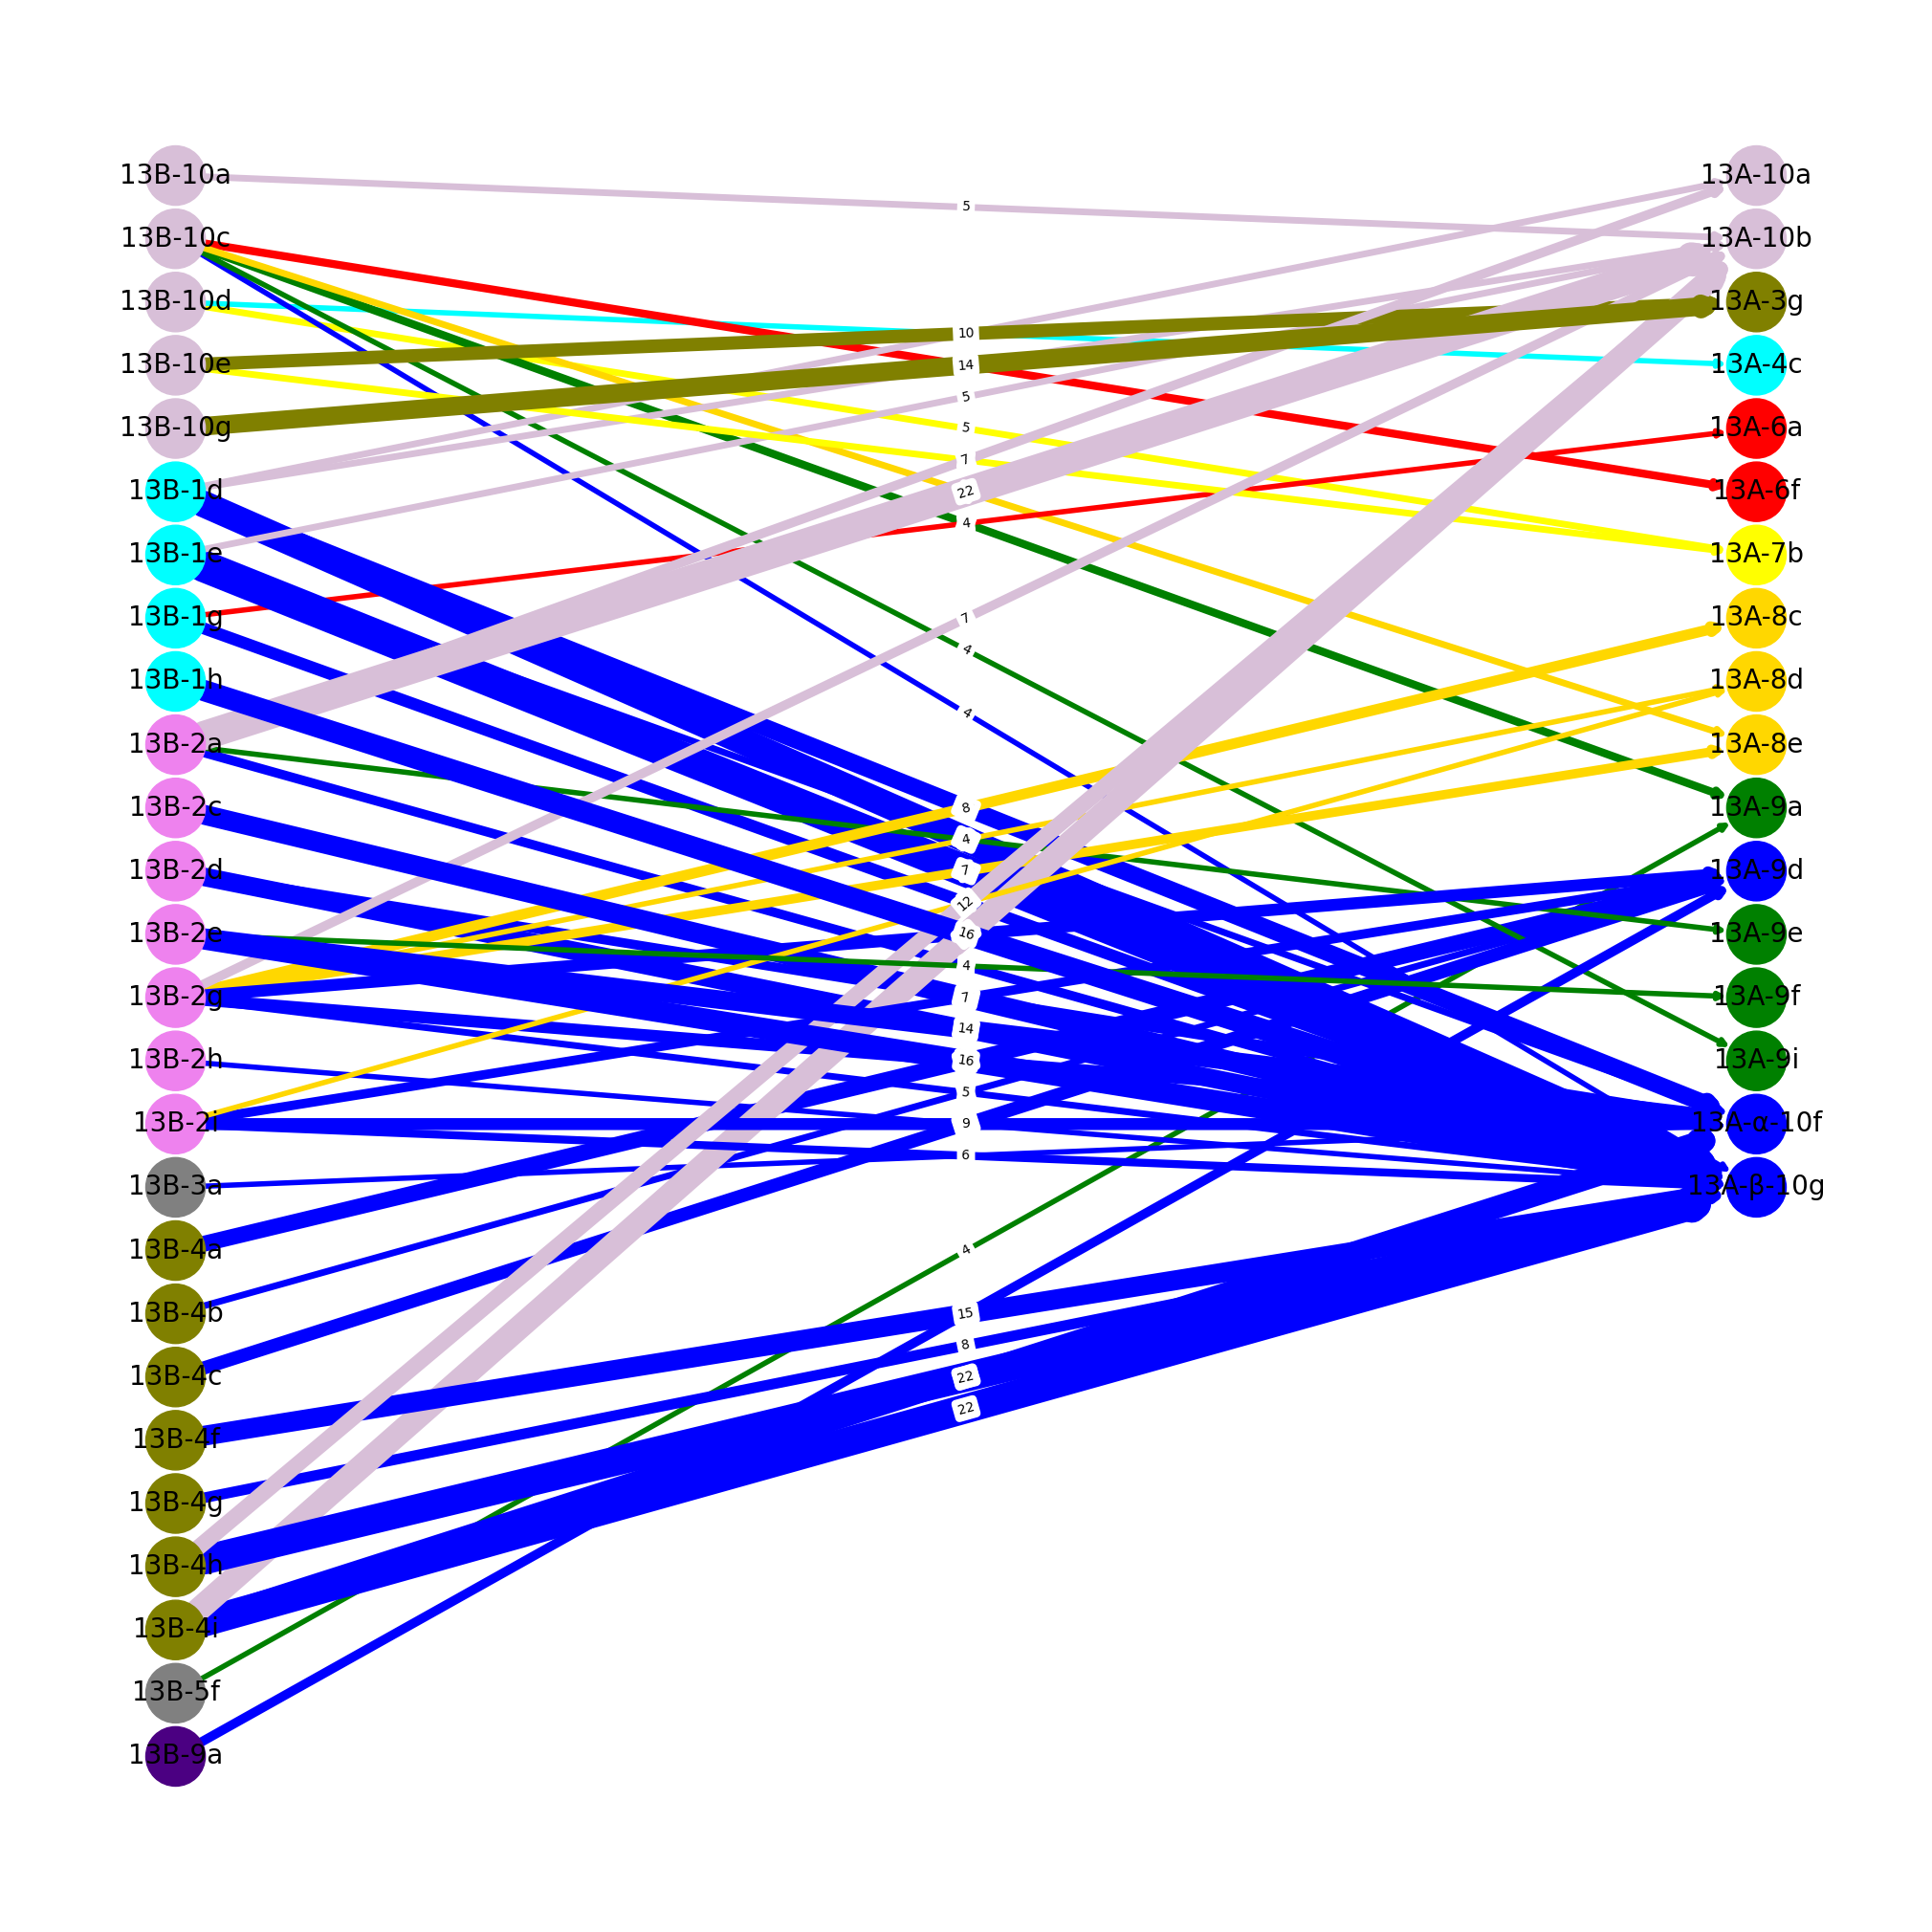

In [42]:
#13B to 13A connections

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# read in the table
df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13AR/Dec23/R13Bupstreamof13A_from13AU.csv')

#new file name Fig 3 and Fig3 Fig supl 1_13B UPSTREAM OF 13A (RIGHT).csv

# change names of columns
df = df.rename(columns={'Name': '13B', 'names.y': 'name'})

# get unique neuron names
neuron_13B_names = df['13B'].unique().tolist()
neuron_13A_names = df['name'].unique().tolist()

# create the graph
G = nx.DiGraph()

# add nodes for 13B and 13A neurons
G.add_nodes_from(neuron_13B_names, bipartite=1)
G.add_nodes_from(neuron_13A_names, bipartite=2)

# add edges for non-zero weights in the connectivity matrix
for index, row in df.iterrows():
    neuron_13B = str(row['13B'])
    neuron_13A = str(row['name'])
    weight = row['weight']

    if weight >= 3:  # synapse count set
        G.add_edge(neuron_13B, neuron_13A, weight=weight)

# define node positions for bipartite layout
pos = {}
pos.update((node, (2, -i)) for i, node in enumerate(sorted(neuron_13A_names))) 
pos.update((node, (1, -i)) for i, node in enumerate(sorted(neuron_13B_names)))

# define edge widths based on weights
edge_widths = [1 * G.edges[edge]['weight'] for edge in G.edges()]

# define a dictionary of colors for 13B neurons
colors_13B = {
    "13B-R-1a": "cyan", "13B-R-1b": "cyan", "13B-R-1c": "cyan", "13B-R-1d": "cyan", "13B-R-1e": "cyan", "13B-R-1f": "cyan", "13B-R-1g": "cyan", "13B-R-1h": "cyan",
    "13B-R-2a": "violet", "13B-R-2b": "violet", "13B-R-2c": "violet", "13B-R-2d": "violet", "13B-R-2e": "violet", "13B-R-2g": "violet", "13B-R-2h": "violet", "13B-R-2i": "violet",
    "13B-R-2j": "violet", "13B-R-2k": "violet", "13B-R-2l": "violet", "13B-R-3a": "gray", "13B-R-3b": "gray", "13B-R-3c": "gray",
    "13B-R-4a": "Olive", "13B-R-4b": "Olive", "13B-R-4c": "Olive", "13B-R-4d": "Olive", "13B-R-4e": "Olive", "13B-R-4f": "Olive", "13B-R-4g": "Olive", "13B-R-4h": "Olive", "13B-R-4i": "Olive",
    "13B-R-5a": "grey", "13B-R-5b": "grey", "13B-R-5c": "grey", "13B-R-5d": "grey", "13B-R-5e": "grey", "13B-R-5f": "grey", "13B-R-6a": "yellow", "13B-R-6b": "yellow",
    "13B-R-7a": "red", "13B-R-7b": "red", "13B-R-7c": "red", "13B-R-7d": "orange", "13B-R-8a": "orange", "13B-R-8b": "orange", "13B-R-9a": "indigo", "13B-R-9b": "indigo", "13B-R-9c": "indigo",
    "13B-R-10a": "Thistle", "13B-R-10b": "Thistle", "13B-R-10c": "Thistle", "13B-R-10d": "Thistle", "13B-R-10e": "Thistle", "13B-R-10f": "Thistle", "13B-R-10g": "Thistle"
}

# define a dictionary of colors for 13A neurons
colors_13A = {
    "13A-R-1a": "purple", "13A-R-1b": "purple", "13A-R-1c": "purple", "13A-R-1d": "purple", "13A-R-1e": "purple", "13A-R-1f": "purple", "13A-R-2a": "violet", "13A-R-2b": "violet",
    "13A-R-3a": "Olive", "13A-R-3b": "Olive", "13A-R-3c": "Olive", "13A-R-3d": "Olive", "13A-R-3e": "Olive", "13A-R-3f": "Olive", "13A-R-3g": "Olive", "13A-R-3h": "Olive",
    "13A-R-3i": "Olive", "13A-R-3j": "Olive", "13A-R-4a": "cyan", "13A-R-4b": "cyan", "13A-R-4c": "cyan", "13A-R-4d": "cyan", "13A-R-4e": "cyan", "13A-R-5a": "orange", "13A-R-5b": "orange",
    "13A-R-5c": "orange", "13A-R-5d": "orange", "13A-R-5e": "orange", "13A-R-5f": "orange", "13A-R-5g": "orange", "13A-R-5h": "orange", "13A-R-5i": "orange", "13A-R-5j": "orange",
    "13A-R-6a": "red", "13A-R-6b": "red", "13A-R-6c": "red", "13A-R-6d": "red", "13A-R-6e": "red", "13A-R-6f": "red", "13A-R-7a": "yellow", "13A-R-7b": "yellow", "13A-R-7c": "yellow",
    "13A-R-8a": "Gold", "13A-R-8b": "Gold", "13A-R-8c": "Gold", "13A-R-8d": "Gold", "13A-R-8e": "Gold", "13A-R-9a": "green", "13A-R-9b": "green", "13A-R-9c": "green", "13A-R-9d": "blue",
    "13A-R-9e": "green", "13A-R-9f": "green", "13A-R-9g": "green", "13A-R-9h": "green", "13A-R-9i": "green", "13A-R-10a": "Thistle", "13A-R-10b": "Thistle", "13A-R-10c": "Thistle",
    "13A-R-10d": "Thistle", "13A-R-10e": "blue", "13A-R-10f": "blue", "13A-R-10g": "blue",    "13A-R-α-10f": "blue",
    "13A-R-β-10g": "blue",
    "13A-R-δ-10e": "blue"
}

# set the node colors
node_colors = [colors_13B.get(node, 'gray') for node in neuron_13B_names] + [colors_13A.get(node, 'gray') for node in neuron_13A_names]

# Create a dictionary of edge colors corresponding to 13A node colors
edge_colors = [colors_13A.get(v, 'gray') for u, v in G.edges()]

# Set the node size
node_size = 2000

# Plot the graph
plt.figure(figsize=(20, 20))
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    labels={node: node.replace('-R', '') for node in G.nodes()},
    font_size=20,
    node_size=node_size,
    edge_color=edge_colors,
    width=edge_widths,
    node_color=node_colors
)

# Draw edge labels with weights
edge_labels = {(edge[0], edge[1]): G.edges[edge]['weight'] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()


#In this code, the labels are modified to remove `-R` only

<Figure size 2000x2000 with 0 Axes>

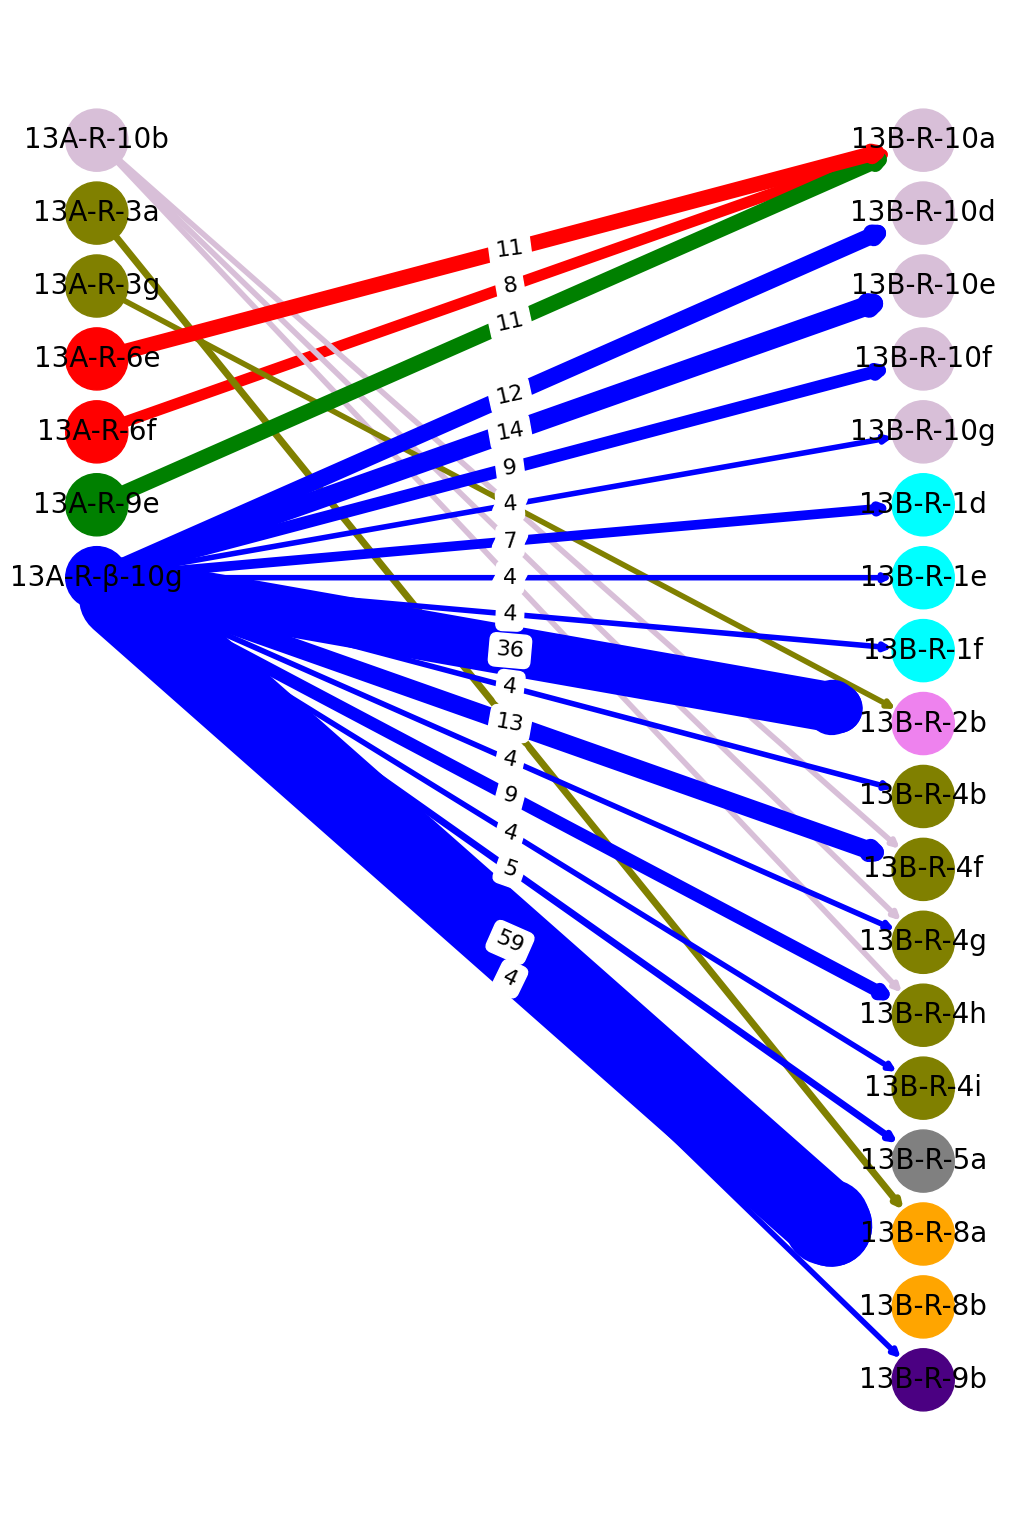

In [782]:
# 13A upstream of 13B neurons


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# read in the table
df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13AR/Dec23/R13A_Uof_13B_from13BU.csv')


#change names of columns
df = df.rename(columns={'Name': '13B', 'names': 'name'})


# get unique muscle, motor neuron, and 13A names
#muscle_names = df['muscle'].unique().tolist()
#motor_neuron_names = df['motor neuron'].unique().tolist()
neuron_13B_names = df['13B'].unique().tolist()
neuron_13A_names = df['name'].unique().tolist()

# create the graph
G = nx.DiGraph()


# add nodes for muscles
#G.add_nodes_from(muscle_names, bipartite=0)

# add nodes for motor neurons and 13B neurons
G.add_nodes_from(neuron_13B_names, bipartite=2)
G.add_nodes_from(neuron_13A_names, bipartite=1)



# add edges for non-zero weights in the connectivity matrix
for index, row in df.iterrows():
    
    #muscle = row['muscle']
    neuron_13B = str(row['13B'])
    neuron_13A = str(row['name'])

    weight = row['weight']
    
    
    
    # add edges between 13B and 13A neurons
    #if weight >= 5: 
    if weight >= 3:#synapse count set
        #G.add_edge(motor_neuron, neuron_13A, group='neuron_13A')
       # G.add_edge(neuron_13B, neuron_13A, weight=weight, group='neuron_13B')
 
        #G.add_edge(neuron_13B, neuron_13A, weight=weight, group='neuron_13A')
        G.add_edge(neuron_13A, neuron_13B, weight=weight, group='neuron_13A')


        


# define node positions for bipartite layout
pos = {}


pos.update((node, (1, -i)) for i, node in enumerate(sorted(neuron_13A_names))) 
pos.update((node, (2, -i)) for i, node in enumerate(sorted(neuron_13B_names)))
# define edge colors
edge_colors = []
edge_widths = []
for u, v, data in G.edges(data=True):
    #if data['group'] == 'neuron_13B':
    if data['group'] == 'neuron_13A':
        edge_colors.append('black')
        edge_widths.append(width)

#edge_weights = [data['weight'] for u, v, data in G.edges(data=True)]
edge_widths = [1 * G.edges[edge]['weight'] for edge in G.edges()]
        
# define a dictionary of colors for 13B neurons

colors_13B = {
    "13B-R-1a": "cyan",
    "13B-R-1b": "cyan",
    "13B-R-1c": "cyan",
    "13B-R-1d": "cyan",
    "13B-R-1e": "cyan",
    "13B-R-1f": "cyan",
    "13B-R-1g": "cyan",
    "13B-R-1h": "cyan",
    "13B-R-2a": "violet",
    "13B-R-2b": "violet",
    "13B-R-2c": "violet",
    "13B-R-2d": "violet",
    "13B-R-2e": "violet",
    "13B-R-2g": "violet",
    "13B-R-2h": "violet",
    "13B-R-2i": "violet",
    "13B-R-2j": "violet",
    "13B-R-2k": "violet",
    "13B-R-2l": "violet",
    "13B-R-3a": "gray",
    "13B-R-3b": "gray",
    "13B-R-3c": "gray",
    "13B-R-4a": "Olive",
    "13B-R-4b": "Olive",
    "13B-R-4c": "Olive",
    "13B-R-4d": "Olive",
    "13B-R-4e": "Olive",
    "13B-R-4f": "Olive",
    "13B-R-4g": "Olive",
    "13B-R-4h": "Olive",
    "13B-R-4i": "Olive",
    "13B-R-5a": "grey",
    "13B-R-5b": "grey",
    "13B-R-5c": "grey",
    "13B-R-5d": "grey",
    "13B-R-5e": "grey",
    "13B-R-5f": "grey",
    "13B-R-6a": "yellow",
    "13B-R-6b": "yellow",
    "13B-R-7a": "red",
    "13B-R-7b": "red",
    "13B-R-7c": "red",
    "13B-R-7d": "orange",
    "13B-R-8a": "orange",
    "13B-R-8b": "orange",
    "13B-R-9a": "indigo",
    "13B-R-9b": "indigo",
    "13B-R-9c": "indigo",
    "13B-R-10a": "Thistle",
    "13B-R-10b": "Thistle",
    "13B-R-10c": "Thistle",
    "13B-R-10d": "Thistle",
    "13B-R-10e": "Thistle",
    "13B-R-10f": "Thistle",
    "13B-R-10g": "Thistle",
}



# define a dictionary of colors for 13A neurons #updated 12-12-23
colors_13A = {
   "13A-R-1a": "purple",
    "13A-R-1b": "purple",
    "13A-R-1c": "purple",
    "13A-R-1d": "purple",
    "13A-R-1e": "purple",
    "13A-R-1f": "purple",
    "13A-R-2a":"violet",
    "13A-R-2b":"violet",
    "13A-R-3a": "Olive",
    "13A-R-3b": "Olive",
    "13A-R-3c": "Olive",
    "13A-R-3d": "Olive",
    "13A-R-3e": "Olive",
    "13A-R-3f": "Olive",
    "13A-R-3g": "Olive",
    "13A-R-3h": "Olive",
    "13A-R-3i": "Olive",
    "13A-R-3j": "Olive",
    "13A-R-4a": "cyan",
    "13A-R-4b": "cyan",
    "13A-R-4c": "cyan",
    "13A-R-4d": "cyan",
    "13A-R-4e": "cyan",
    "13A-R-5a": "orange",
    "13A-R-5b": "orange",
    "13A-R-5c": "orange",
    "13A-R-5d": "orange",
    "13A-R-5e": "orange",
    "13A-R-5f": "orange",
    "13A-R-5g": "orange",
    "13A-R-5h": "orange",
    "13A-R-5i": "orange",
    "13A-R-5j": "orange",
    "13A-R-6a": "red",
    "13A-R-6b": "red",
    "13A-R-6c": "red",
    "13A-R-6d": "red",
    "13A-R-6e": "red",
    "13A-R-6f": "red",
    "13A-R-7a": "yellow",
    "13A-R-7b": "yellow",
    "13A-R-7c": "yellow",
    "13A-R-8a": "Gold",
    "13A-R-8b": "Gold",
    "13A-R-8c": "Gold",
    "13A-R-8d": "Gold",
    "13A-R-8e": "Gold",
    "13A-R-9a": "green",
    "13A-R-9b": "green",
    "13A-R-9c": "green",
    "13A-R-9d": "blue", #γ
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
   # "13A-R-9d": "blue",
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
    "13A-R-10a": "Thistle",
    "13A-R-10b": "Thistle",
    "13A-R-10c": "Thistle",
    "13A-R-10d": "Thistle",
    "13A-R-α-10f": "blue",
    "13A-R-β-10g": "blue",
    "13A-R-δ-10e": "blue"
}


node_colors = [colors_13B[node] for node in neuron_13B_names] + [colors_13A[node] for node in neuron_13A_names]

cmap = plt.cm.Reds
norm = plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
#edge_colors = [cmap(norm(data['weight'])) for u, v, data in G.edges(data=True)]


# Calculate the line widths based on the edge weights
max_weight = max(edge_weights)
min_weight = min(edge_weights)
lw = [(w - min_weight) / (max_weight - min_weight) * 3 + 1 for w in edge_weights]


node_size = 2000


# Show the plot
plt.gcf().set_size_inches(20, 20)
plt.show()

edge_colors_13A = {edge: colors_13A[edge[0]] for edge in G.edges() if edge[0] in neuron_13A_names}


# Draw the graph with updated line widths and edge colors

#nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    font_size=20,
    node_size=node_size,
    #edge_color=[edge_colors_13B.get(edge, 'gray') for edge in G.edges()],
    edge_color=[edge_colors_13A.get(edge, 'gray') for edge in G.edges()],
    width=edge_widths,
    node_color=node_colors
)

#nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.5)
edge_labels = {(edge[0], edge[1]): G.edges[edge]['weight'] for edge in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=font_size)

#plt.savefig('/Users/Syed/Desktop/pri13AL_circuit/Figures/13B_13Amatrix_12-11-23.tiff', format='tiff', bbox_inches='tight')

# Show the plot
plt.gcf().set_size_inches(10, 15)
plt.show()

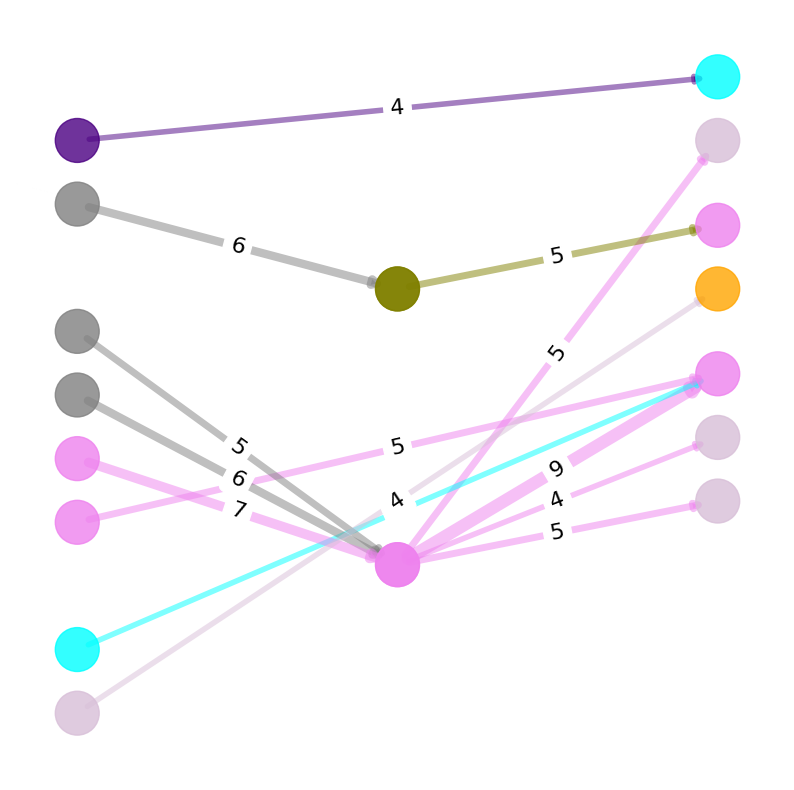

In [64]:
#R13B-13B connections

import matplotlib.pyplot as plt
import networkx as nx



df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13B/R13B_D_13B.csv')


df = df.rename(columns={'Name.x': 'presynaptic', 'Name.y': 'postsynaptic'})

pre13A = df['presynaptic'].unique().tolist()
post13A = df['postsynaptic'].unique().tolist()
                 

G = nx.DiGraph()
G.add_nodes_from(pre13A)
G.add_nodes_from(post13A)

for i in range(len(df)):
    G.add_edge(df.iloc[i]['presynaptic'], df.iloc[i]['postsynaptic'], weight=df.iloc[i]['weight'])

pre13A_sorted = sorted(pre13A)
post13A_sorted = sorted(post13A)


colors_13A = {   
    "13B-R-1a": "cyan",
    "13B-R-1b": "cyan",
    "13B-R-1c": "cyan",
    "13B-R-1d": "cyan",
    "13B-R-1e": "cyan",
    "13B-R-1f": "cyan",
    "13B-R-1g": "cyan",
    "13B-R-1h": "cyan",
    "13B-R-2a": "violet",
    "13B-R-2b": "violet",
    "13B-R-2c": "violet",
    "13B-R-2d": "violet",
    "13B-R-2e": "violet",
    "13B-R-2g": "violet",
    "13B-R-2h": "violet",
    "13B-R-2i": "violet",
    "13B-R-2j": "violet",
    "13B-R-2k": "violet",
    "13B-R-2l": "violet",
    "13B-R-3a": "gray",
    "13B-R-3b": "gray",
    "13B-R-3c": "gray",
    "13B-R-4a": "Olive",
    "13B-R-4b": "Olive",
    "13B-R-4c": "Olive",
    "13B-R-4d": "Olive",
    "13B-R-4e": "Olive",
    "13B-R-4f": "Olive",
    "13B-R-4g": "Olive",
    "13B-R-4h": "Olive",
    "13B-R-4i": "Olive",
    "13B-R-5a": "grey",
    "13B-R-5b": "grey",
    "13B-R-5c": "grey",
    "13B-R-5d": "grey",
    "13B-R-5e": "grey",
    "13B-R-5f": "grey",
    "13B-R-6a": "yellow",
    "13B-R-6b": "yellow",
    "13B-R-7a": "red",
    "13B-R-7b": "red",
    "13B-R-7c": "red",
    "13B-R-7d": "orange",
    "13B-R-8a": "orange",
    "13B-R-8b": "orange",
    "13B-R-9a": "indigo",
    "13B-R-9b": "indigo",
    "13B-R-9c": "indigo",
    "13B-R-10a": "Thistle",
    "13B-R-10b": "Thistle",
    "13B-R-10c": "Thistle",
    "13B-R-10d": "Thistle",
    "13B-R-10e": "Thistle",
    "13B-R-10f": "Thistle",
    "13B-R-10g": "Thistle",
}

                 
# Define a default color for missing keys
default_color = "gray"

pos = {}

pre13A_positions = {node: (0, i) for i, node in enumerate(pre13A_sorted)}
pos.update(pre13A_positions)


#        
post13A_positions = {}
y_offset = len(pre13A_sorted)

for i, node in enumerate(post13A):
    if node in pre13A_sorted:
        post13A_positions[node] = (1, i)
    else:
        post13A_positions[node] = (2, i-10)  # Use (2, -i) instead of (1, i)

pos.update(post13A_positions)
    
# Manually move specific nodes
manually_moved_nodes = ["R13A10h_5R"]
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i+10)
manually_moved_nodes = ["13A-R-3g"]
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1, i+21)
manually_moved_nodes = [ '13A-R-3f']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+20)
manually_moved_nodes = [ '13A-R-3e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+25)
manually_moved_nodes = [ '13A-R-3d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+30)
manually_moved_nodes = [ '13A-R-3c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+35)
manually_moved_nodes = ["13A-R-4e"]
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-50)
    
manually_moved_nodes = [ '13A-R-α-10f']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-18)
                        
manually_moved_nodes = [ '13A-R-6d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1, i-10)
manually_moved_nodes = [ '13A-R-1c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2.2, i-18)
manually_moved_nodes = [ '13A-R-7a']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-5.5)
manually_moved_nodes = [ '13A-R-8e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-14)
manually_moved_nodes = [ '13A-R-8a']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-12)
manually_moved_nodes = [ '13A-R-8b']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-10)
manually_moved_nodes = [ '13A-R-8d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-19)
manually_moved_nodes = [ '13A-R-8c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-19.5)
manually_moved_nodes = [ '13A-R-9a']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i+22)
manually_moved_nodes = [ '13A-R-9b']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-18.5)
manually_moved_nodes = [ '13A-R-9i']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-8)
manually_moved_nodes = [ '13A-R-1c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-15)
manually_moved_nodes = ["13A-R-9d"] #-γ-
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (2, i-2)
manually_moved_nodes = ['13A-R-δ-10e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0, i-34)
manually_moved_nodes = [ '13A-R-9e']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1.5, i-25)
manually_moved_nodes = ["13A-R-9f"] #-γ-
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0.5, i-15)
manually_moved_nodes = [ '13A-R-10c']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (1, i+5)
manually_moved_nodes = [ '13A-R-10d']
for i, node in enumerate(manually_moved_nodes):
    pos[node] = (0.5, i+5)


spacing_factor = 2  # Adjust the spacing factor as desired

# Adjust the y-coordinates of the nodes
pos = {node: (x, y + (spacing_factor * i)) if x != 3 else (x, y + (spacing_factor * i)) for i, (node, (x, y)) in enumerate(pos.items())}


#
plt.figure(figsize=(10, 10))

# Use default_color for nodes not found in colors_13A dictionary
node_color_pre13A = [colors_13A.get(node, default_color) for node in pre13A]
node_color_post13A = [colors_13A.get(node, default_color) for node in post13A]

nx.draw_networkx_nodes(G, pos, nodelist=pre13A, node_color=node_color_pre13A, node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=post13A, node_color=node_color_post13A, node_size=1000, alpha=0.8)
#nx.draw_networkx_labels(G, pos, font_size=16)

# Adjust the positions of the edges
edge_pos = {}
for edge in G.edges:
    x = [pos[edge[0]][0], pos[edge[1]][0]]
    y = [pos[edge[0]][1], pos[edge[1]][1]]
    edge_pos[edge] = list(zip(x, y))

edge_color = [colors_13A.get(G.edges[edge]['weight'], colors_13A.get(edge[0], default_color)) for edge in G.edges]
edge_width = [G.edges[edge]['weight'] for edge in G.edges]
alpha = 0.5
font_size = 16
edge_labels = {(edge[0], edge[1]): G.edges[edge]['weight'] for edge in G.edges}

# Draw the edges with adjusted positions
nx.draw_networkx_edges(G, pos, edgelist=edge_pos, width=edge_width, edge_color=edge_color, alpha=alpha)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=font_size)
#plt.savefig('/Users/Syed/Desktop/pri13AL_circuit/Figures/R13B_13B_12-11-23.tiff', format='tiff', bbox_inches='tight')


plt.axis('off')
plt.show()


/Users/Syed/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


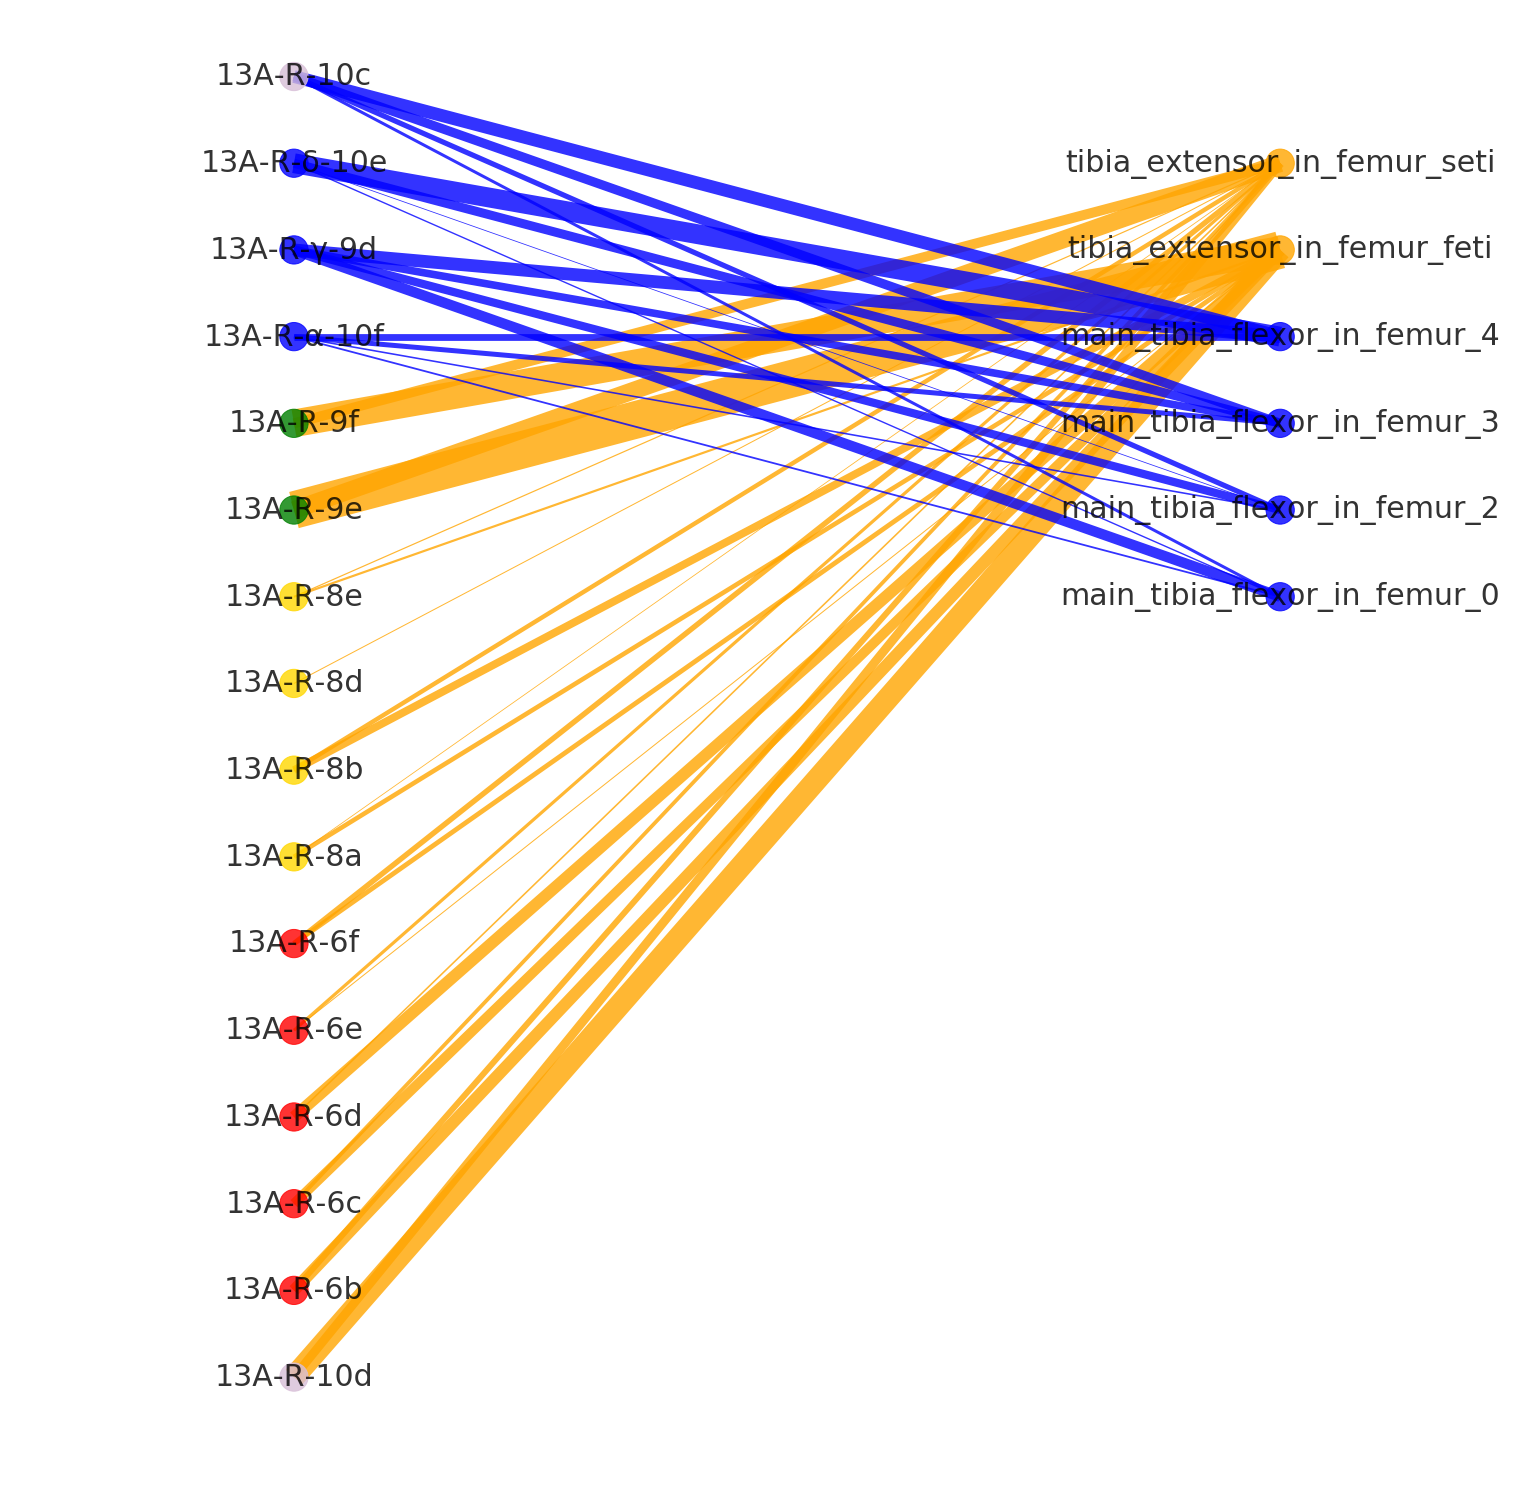

In [213]:
#Figure3 Femur-Tibia joint

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the table

df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/R13A_D_MNs.csv')

#new file name = Fig2_13A (RIGHT) _DOWNSTREAM MOTOR NEURONS.csv


df = df.replace({'13A-R-9d': '13A-R-γ-9d'})


# Select a specific motor neuron
target_motor_neurons = ["main_tibia_flexor_in_femur_0", "main_tibia_flexor_in_femur_1", "main_tibia_flexor_in_femur_2",
                        "main_tibia_flexor_in_femur_3", "main_tibia_flexor_in_femur_4", "tibia_extensor_in_femur_seti",
                        "tibia_extensor_in_femur_feti"]

# Filter the dataframe to include only the rows with the target motor neurons
filtered_df = df[df['motor neuron'].isin(target_motor_neurons)]
#filtered_df2 = df2[df2['motor neuron'].isin(target_motor_neurons)]

# Get the unique motor neuron and 13A neuron names from the filtered dataframe
motor_neuron_names = filtered_df['motor neuron'].unique().tolist()
neuron_13A_names = filtered_df['13A'].unique().tolist()


# Create a graph object
G = nx.Graph()

# Add edges and weights to the graph
for _, row in filtered_df.iterrows():
    motor_neuron = row['motor neuron']
    neuron_13A = row['13A']
    weight = row['weight']
    G.add_edge(motor_neuron, neuron_13A, weight=weight)

#change colors corresponding to Ti extension  and flexion 
motor_neuron_colors = {"extracoxal_trochanter_depressor_in_thorax_Vn": "red", 
                       "tergopleural_promotor_pleural_promotor_in_thorax_miller_28_30": "red",
                       "tergotrochanter_in_thorax_2": "red", 
                       "tergotrochanter_in_thorax_1": "red", 
                       "tergotrochanter_in_thorax_0": "red", 
                       "tergotrochanter_in_thorax_3": "red", 
                       "trochanter_extensor_in_coxa_Lg": "red", 
                       "tibia_extensor_in_femur_seti": "orange",
                       "tibia_extensor_in_femur_feti": "orange", 
                       "auxiliary_tibia_flexor_in_femur_A2": "lightblue", 
                       "auxiliary_tibia_flexor_in_femur_A1": "lightblue",
                       "auxiliary_tibia_flexor_in_femur_E": "lightblue",
                       "auxiliary_tibia_flexor_in_femur_Bslow": "lightblue", 
                       "femur_reductor_in_trochanter": "cyan", 
                       "ltm_medial_dendrite": "grey", 
                       "ltm_small_medial_dendrite": "grey", 
                       "main_tibia_flexor_in_femur_0": "blue", 
                       "main_tibia_flexor_in_femur_1": "blue", 
                       "main_tibia_flexor_in_femur_2": "blue", 
                       "main_tibia_flexor_in_femur_3": "blue", 
                       "main_tibia_flexor_in_femur_4": "blue", 
                       "pleural_remotor_and_abductor_in_thorax_miller_29": "cyan", 
                       "ster-l_anterior_rotator_in_thorax_miller_31": "red", 
                       "ster-l_posterior_rotator_in_thorax_miller_32": "cyan", 
                       "sternal_adductor_miller_in_thorax_miller_33": "grey", 
                       "sternal_anterior_rotator_in_thorax_miller_31": "red", 
                       "sternal_posterior_rotator_in_thorax_miller_32": "cyan",
                       "tarsus_depressor_in_tibia_medial": "cyan", 
                       "tarsus_depressor_in_tibia_ventralU": "cyan", 
                       "tarsus_unidentified_in_tibia_A1": "gray", 
                       "tarsus_unidentified_in_tibia_A2": "gray", 
                       "tarsus_unidentified_in_tibia_E": "gray", 
                       "tarsus_unidentified_in_tibia_Bslow": "gray",
                       "trochanter_flexor_in_coxa_Ac" : "cyan",
                       "trochanter_flexor_in_coxa_AcPst": "cyan", 
                       "trochanter_flexor_in_coxa_Vn": "cyan", 
                       "trochanter_promotor_in_coxa": "cyan"}



colors_13A = {                 
                 
    "13A-R-1a": "purple",
    "13A-R-1b": "purple",
    "13A-R-1c": "purple",
    "13A-R-1d": "purple",
    "13A-R-1e": "purple",
    "13A-R-1f": "purple",
    "13A-R-2a":"violet",
    "13A-R-2b":"violet",
    "13A-R-3a": "Olive",
    "13A-R-3b": "Olive",
    "13A-R-3c": "Olive",
    "13A-R-3d": "Olive",
    "13A-R-3e": "Olive",
    "13A-R-3f": "Olive",
    "13A-R-3g": "Olive",
    "13A-R-3h": "Olive",
    "13A-R-3i": "Olive",
    "13A-R-3j": "Olive",
    "13A-R-4a": "cyan",
    "13A-R-4b": "cyan",
    "13A-R-4c": "cyan",
    "13A-R-4d": "cyan",
    "13A-R-4e": "cyan",
    "13A-R-5a": "orange",
    "13A-R-5b": "orange",
    "13A-R-5c": "orange",
    "13A-R-5d": "orange",
    "13A-R-5e": "orange",
    "13A-R-5f": "orange",
    "13A-R-5g": "orange",
    "13A-R-5h": "orange",
    "13A-R-5i": "orange",
    "13A-R-5j": "orange",
    "13A-R-6a": "red",
    "13A-R-6b": "red",
    "13A-R-6c": "red",
    "13A-R-6d": "red",
    "13A-R-6e": "red",
    "13A-R-6f": "red",
    "13A-R-7a": "yellow",
    "13A-R-7b": "yellow",
    "13A-R-7c": "yellow",
    "13A-R-8a": "Gold",
    "13A-R-8b": "Gold",
    "13A-R-8c": "Gold",
    "13A-R-8d": "Gold",
    "13A-R-8e": "Gold",
    "13A-R-9a": "green",
    "13A-R-9b": "green",
    "13A-R-9c": "green",
    "13A-R-9d": "blue", #γ
    '13A-R-γ-9d': "blue", 
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
   # "13A-R-9d": "blue",
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
    "13A-R-10a": "Thistle",
    "13A-R-10b": "Thistle",
    "13A-R-10c": "Thistle",
    "13A-R-10d": "Thistle",
    "13A-R-α-10f": "blue",
    "13A-R-β-10g": "blue",
    "13A-R-δ-10e": "blue"
}


# Create a dictionary to store the node colors
node_colors = {}

# Assign colors to motor neurons
for node in motor_neuron_names:
    if node in motor_neuron_colors:
        node_colors[node] = motor_neuron_colors[node]
    else:
        node_colors[node] = "blue"

# Assign colors to 13A neurons
for node in neuron_13A_names:
    if node in colors_13A:
        node_colors[node] = colors_13A[node]
    else:
        node_colors[node] = "blue"

# Create a subgraph containing only the selected motor neurons and 13A neurons
subgraph = G.subgraph(motor_neuron_names + neuron_13A_names)

# Set the positions of the nodes
pos = {}

pos.update((node, (0, i)) for i, node in enumerate(motor_neuron_names)) 
pos.update((node, (-0.2, i-15)) for i, node in enumerate(sorted(neuron_13A_names)))
pos.update({'13A-R-10c': (-0.2, i-3)})  # Set the position of '13A-R-10c' to the top



# Set the node colors
node_colors = [node_colors[node] for node in subgraph.nodes()]


edge_colors = [motor_neuron_colors.get(u, "blue") for u, v in subgraph.edges()]

# Modify the edge colors based on the target motor neuron color
edge_colors = [motor_neuron_colors.get(v, edge_colors[i]) for i, (_, v) in enumerate(subgraph.edges())]


edge_widths = [subgraph[u][v]['weight'] * 0.2 for u, v in subgraph.edges()]

# Draw the subgraph
nx.draw(
    subgraph, pos=pos, with_labels=True, font_size=30, node_size=800, node_color=node_colors,
    edge_color=edge_colors, width=edge_widths,cmap=plt.cm.Reds, alpha=0.8
)

# Add weight labels to the edges
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
#nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=16)
#plt.savefig('/Users/Syed/Desktop/pri13AL_circuit/Figures/13A_MNmedialjoint2_12-11-23.tiff', format='tiff', bbox_inches='tight')


plt.gcf().set_size_inches(20, 20)
#plt.gcf().set_size_inches(10, 10)

# Show the plot
plt.show()


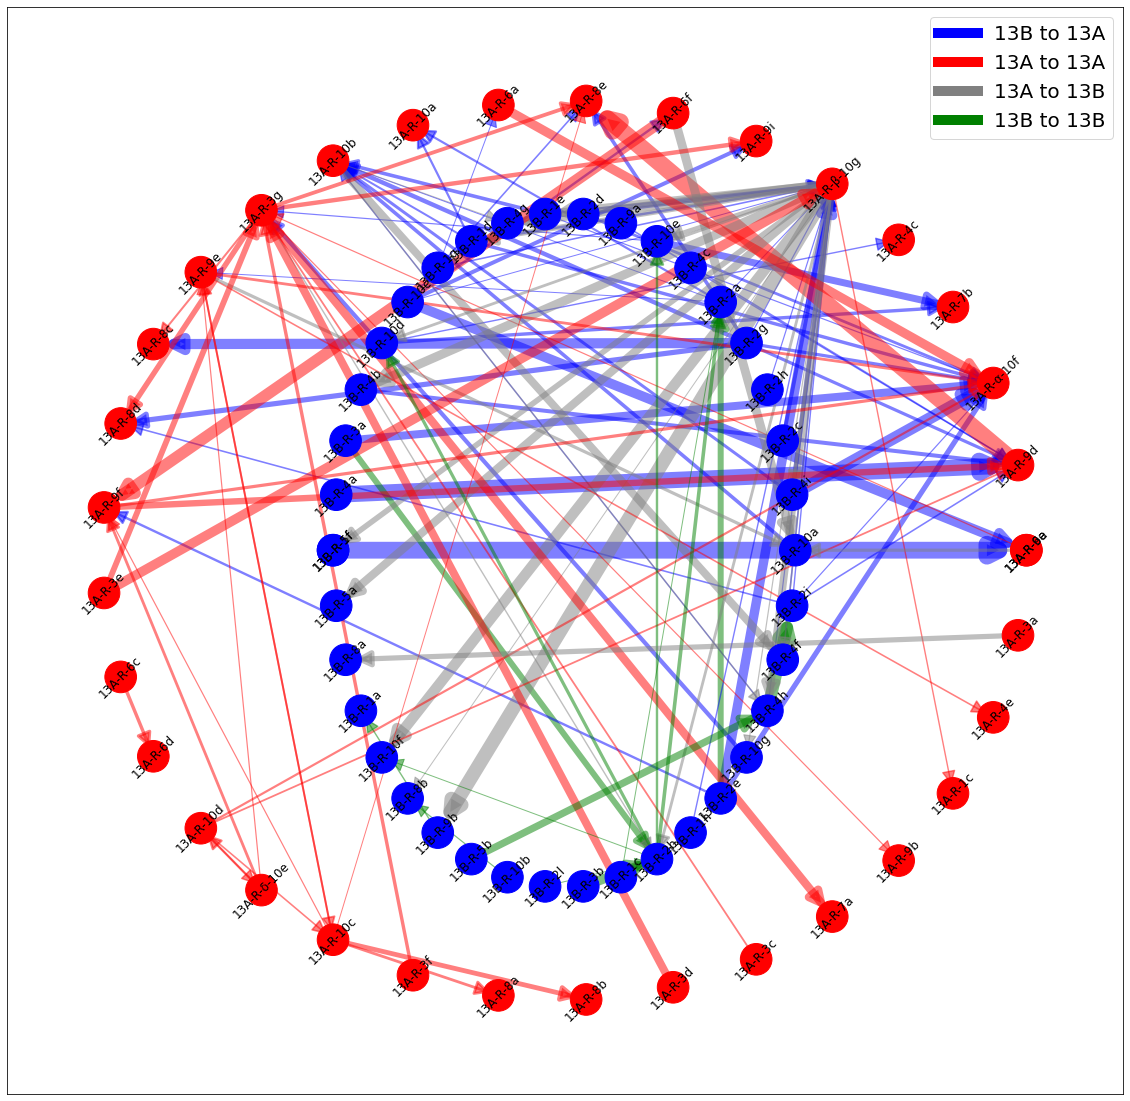

In [16]:
#Connectivity matrix 

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Code 1: 13B to 13A connections
df_13B_to_13A = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13AR/Dec23/R13Bupstreamof13A_from13AU_DEC23.csv')
df_13B_to_13A = df_13B_to_13A.rename(columns={'Name': 'presynaptic', 'names.y': 'postsynaptic'})
G_13B_to_13A = nx.DiGraph()
G_13B_to_13A.add_nodes_from(df_13B_to_13A['presynaptic'].unique().tolist() + df_13B_to_13A['postsynaptic'].unique().tolist())
G_13B_to_13A.add_edges_from(zip(df_13B_to_13A['presynaptic'], df_13B_to_13A['postsynaptic']), weight=df_13B_to_13A['weight'])

# Code 2: 13A to 13A connectivity
df_13A_to_13A = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13AR/Dec23/R13A_D_13A_froms13ADdec23.csv')
df_13A_to_13A = df_13A_to_13A.rename(columns={'names': 'presynaptic', 'names.y': 'postsynaptic'})
G_13A_to_13A = nx.DiGraph()
G_13A_to_13A.add_edges_from(zip(df_13A_to_13A['presynaptic'], df_13A_to_13A['postsynaptic']), weight=df_13A_to_13A['weight'])

# Code 3: 13B to 13B connectivity
df_13B_to_13B = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13B/R13B_D_13B_Dec23from13D.csv')
df_13B_to_13B = df_13B_to_13B.rename(columns={'Name.x': 'presynaptic', 'Name.y': 'postsynaptic'})
G_13B_to_13B = nx.DiGraph()
G_13B_to_13B.add_nodes_from(df_13B_to_13B['presynaptic'].unique().tolist() + df_13B_to_13B['postsynaptic'].unique().tolist())
G_13B_to_13B.add_edges_from(zip(df_13B_to_13B['presynaptic'], df_13B_to_13B['postsynaptic']), weight=df_13B_to_13B['weight'])

# Code 4: 13A to 13B connectivity
df_13A_to_13B = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13AR/Dec23/R13A_Uof_13D_from13BU_dec23.csv')
df_13A_to_13B = df_13A_to_13B.rename(columns={'names': 'presynaptic', 'Name': 'postsynaptic'})
G_13A_to_13B = nx.DiGraph()
G_13A_to_13B.add_nodes_from(df_13A_to_13B['presynaptic'].unique().tolist() + df_13A_to_13B['postsynaptic'].unique().tolist(), bipartite=True)
G_13A_to_13B.add_edges_from(zip(df_13A_to_13B['presynaptic'], df_13A_to_13B['postsynaptic']), weight=df_13A_to_13B['weight'])

# Create a consolidated graph
G_combined = nx.compose_all([G_13B_to_13A, G_13A_to_13A, G_13B_to_13B, G_13A_to_13B])


#########
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#node_colors = [colors_13A[node] if '13A' in node else 'gray' for node in G_combined.nodes()]
node_colors = ['red' if '13A' in node else 'blue' for node in G_combined.nodes()]

node_labels = {node: node for node in G_combined.nodes()}
#node_labels = {node: node.replace('13A-9d', '3A-R-γ-9d') for node in G_combined.nodes()}
# Define edge colors based on connection types
edge_colors = []
for edge in G_combined.edges(data=True):
    source, target, data = edge
    if '13B' in source and '13A' in target:
        edge_colors.append('blue')  # 13B to 13A edges are green
    elif '13A' in source and '13A' in target:
        edge_colors.append('red')  # 13A to 13A edges are red
    elif '13A' in source and '13B' in target:
        edge_colors.append('gray')  # 13A to 13B edges are blue
    elif '13B' in source and '13B' in target:
        edge_colors.append('green')  # 13B to 13B edges are cyan

# Define node positions, edge widths (adjust as needed)

# Define node positions for an oval layout
def oval_layout(nodes, center, radius_x, radius_y):
    theta = np.linspace(0, 2*np.pi, len(nodes))
    x = center[0] + radius_x * np.cos(theta)
    y = center[1] + radius_y * np.sin(theta)
    return {node: (x[i], y[i]) for i, node in enumerate(nodes)}

# Define the center and radii for the oval layout
center = (0, 0)  # Adjust the center as needed
radius_x = 3000  # Adjust the x-radius as needed
radius_y = 10000  # Adjust the y-radius as needed

# Positions for 13A nodes in the outer oval
pos_13A_oval = oval_layout([node for node in G_combined.nodes() if '13A' in node], center, radius_x, radius_y)

# Positions for 13B nodes in the inner oval
pos_13B_oval = oval_layout([node for node in G_combined.nodes() if '13B' in node], center, radius_x * -0.5, radius_y * 0.75)

# Combine node positions
pos_combined_oval = {**pos_13A_oval, **pos_13B_oval}

# Draw the consolidated graph with the updated oval layout
plt.figure(figsize=(20, 20))

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos_combined_oval, node_size=1000, node_color=node_colors)

# Draw edges with transparency
#nx.draw_networkx_edges(G_combined, pos_combined_oval, edge_color=edge_colors, width=edge_widths, alpha=0.6)
nx.draw_networkx_edges(G_combined, pos_combined_oval, edge_color=edge_colors, width=edge_widths, alpha=0.5, arrowsize=30)


# Add the legend
from matplotlib.lines import Line2D

# Define a custom legend with connection types and corresponding colors
legend_elements = [
    Line2D([0], [0], color='blue', lw=10, label='13B to 13A'),
    Line2D([0], [0], color='red', lw=10, label='13A to 13A'),
    Line2D([0], [0], color='gray', lw=10, label='13A to 13B'),
    Line2D([0], [0], color='green', lw=10, label='13B to 13B'),
]

# Add the legend
plt.legend(handles=legend_elements, loc='upper right', fontsize=20)


for node, (x, y) in pos_combined_oval.items():
    plt.text(x, y, node_labels[node], fontsize=12
             , rotation=45, ha='center', va='center')


plt.show()


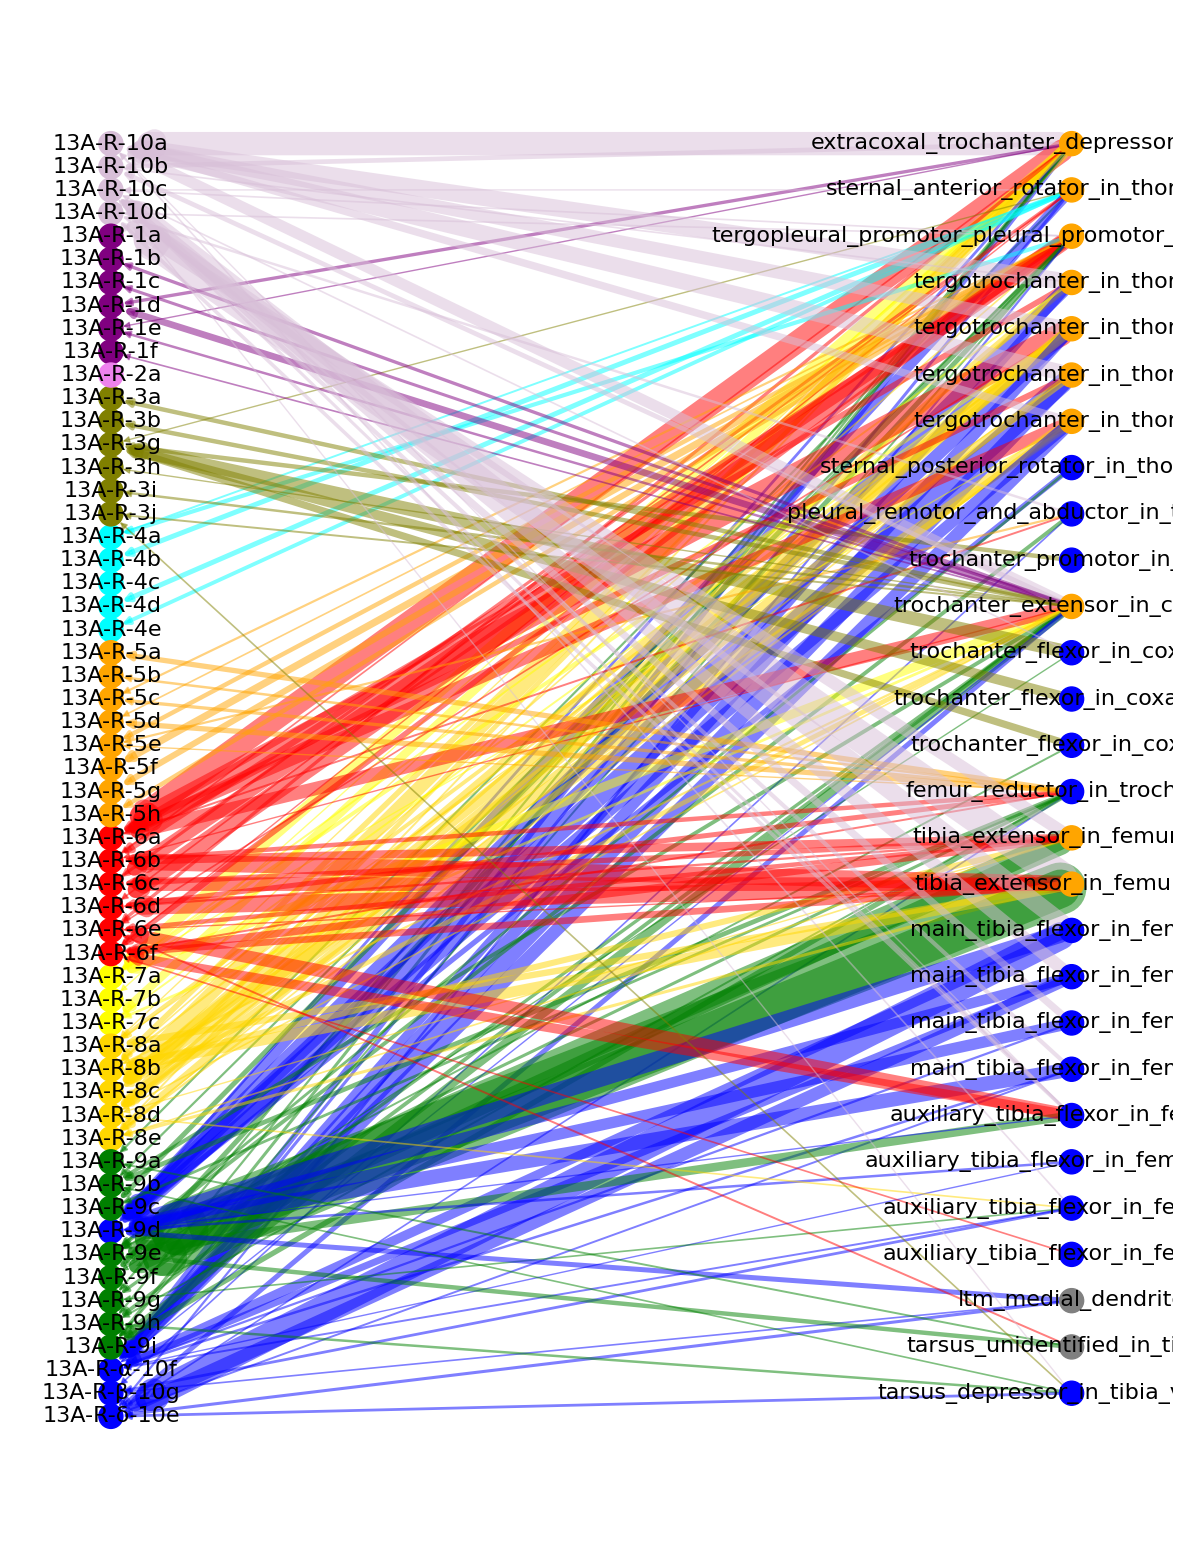

In [65]:
#R13A_MN connections #modified 12-12-23, #edge color based on nodes #connectivity matrix
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#change colors of MNs based on ext /flx

# read in the table
#df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/13B/13BL/L13B_D_MN.csv') #13B_MN
df = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/R13A_D_MNsdec23.csv')

# get unique motor neuron and 13B neuron names
motor_neuron_names = df['motor neuron'].unique().tolist()
neuron_13A_names = df['13A'].unique().tolist()

# create the graph
G = nx.DiGraph()

# add nodes for motor neurons and 13B neurons
G.add_nodes_from(motor_neuron_names, bipartite=1)
G.add_nodes_from(neuron_13A_names, bipartite=2)

# define a dictionary of colors for 13A neurons
colors_13A = {

    "13A-R-1a": "purple",
    "13A-R-1b": "purple",
    "13A-R-1c": "purple",
    "13A-R-1d": "purple",
    "13A-R-1e": "purple",
    "13A-R-1f": "purple",
    "13A-R-2a":"violet",
    "13A-R-2b":"violet",
    "13A-R-3a": "Olive",
    "13A-R-3b": "Olive",
    "13A-R-3c": "Olive",
    "13A-R-3d": "Olive",
    "13A-R-3e": "Olive",
    "13A-R-3f": "Olive",
    "13A-R-3g": "Olive",
    "13A-R-3h": "Olive",
    "13A-R-3i": "Olive",
    "13A-R-3j": "Olive",
    "13A-R-4a": "cyan",
    "13A-R-4b": "cyan",
    "13A-R-4c": "cyan",
    "13A-R-4d": "cyan",
    "13A-R-4e": "cyan",
    "13A-R-5a": "orange",
    "13A-R-5b": "orange",
    "13A-R-5c": "orange",
    "13A-R-5d": "orange",
    "13A-R-5e": "orange",
    "13A-R-5f": "orange",
    "13A-R-5g": "orange",
    "13A-R-5h": "orange",
    "13A-R-5i": "orange",
    "13A-R-5j": "orange",
    "13A-R-6a": "red",
    "13A-R-6b": "red",
    "13A-R-6c": "red",
    "13A-R-6d": "red",
    "13A-R-6e": "red",
    "13A-R-6f": "red",
    "13A-R-7a": "yellow",
    "13A-R-7b": "yellow",
    "13A-R-7c": "yellow",
    "13A-R-8a": "Gold",
    "13A-R-8b": "Gold",
    "13A-R-8c": "Gold",
    "13A-R-8d": "Gold",
    "13A-R-8e": "Gold",
    "13A-R-9a": "green",
    "13A-R-9b": "green",
    "13A-R-9c": "green",
    "13A-R-9d": "blue", #γ
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
   # "13A-R-9d": "blue",
    "13A-R-9e": "green",
    "13A-R-9f": "green",
    "13A-R-9g": "green",
    "13A-R-9h": "green",
    "13A-R-9i": "green",
    "13A-R-10a": "Thistle",
    "13A-R-10b": "Thistle",
    "13A-R-10c": "Thistle",
    "13A-R-10d": "Thistle",
    "13A-R-α-10f": "blue",
    "13A-R-β-10g": "blue",
    "13A-R-δ-10e": "blue"
}





# add edges for non-zero weights in the connectivity matrix
for index, row in df.iterrows():
    motor_neuron = row['motor neuron']
    #neuron_13B = row['13B']
    neuron_13A = row['13A']
    weight = row['weight']

    # add edges between motor neurons and 13B neurons
    if weight >=5:
        #G.add_edge(motor_neuron, neuron_13B, weight=weight, group='neuron_13B', color='purple')
        G.add_edge(motor_neuron, neuron_13A, weight=weight, group='neuron_13A', color='purple')
# define node positions for bipartite layout
pos = {}

# Increase spacing between motor neurons
spacing = 2  # You can adjust this value based on your preference

# Update node positions for motor neurons in the pos dictionary
pos.update((node, (0.5, -i * spacing)) for i, node in enumerate(motor_neuron_names))


#pos.update((node, (1.5, -i)) for i, node in enumerate(motor_neuron_names))
#pos.update((node, (0, -i)) for i, node in enumerate(motor_neuron_names))
#pos.update((node, (1, -i)) for i, node in enumerate(sorted(neuron_13B_names)))
pos.update((node, (0, -i)) for i, node in enumerate(sorted(neuron_13A_names)))

# define edge colors
#edge_colors = [data.get('color', 'purple') for u, v, data in G.edges(data=True)]

# Create a list of edge colors based on the colors of 13B nodes
#edge_colors = [colors_13B[edge[1]] for edge in G.edges()]       #edge color based on 13A
edge_colors = [colors_13A[edge[1]] for edge in G.edges()]

#edge_colors = [motor_neuron_colors[edge[0]] for edge in G.edges()]    #edge color based on MN

# Create a list of edge widths based on the weights of the edges
edge_widths = [0.2 * G.edges[edge]['weight'] for edge in G.edges()]

# define node colors for motor neurons
# define node colors for motor neurons

#change colors corresponding to extension (red) and flexion (cyan)



motor_neuron_colors = {
    "extracoxal_trochanter_depressor_in_thorax_Vn": "orange",
    "tergopleural_promotor_pleural_promotor_in_thorax_miller_28_30": "orange",
    "tergotrochanter_in_thorax_2": "orange",
    "tergotrochanter_in_thorax_1": "orange",
    "tergotrochanter_in_thorax_0": "orange",
    "tergotrochanter_in_thorax_3": "orange",
    "trochanter_extensor_in_coxa_Lg": "orange",
    "tibia_extensor_in_femur_seti": "orange",
    "tibia_extensor_in_femur_feti": "orange",
    "auxiliary_tibia_flexor_in_femur_A2": "blue",
    "auxiliary_tibia_flexor_in_femur_A1": "blue",
    "auxiliary_tibia_flexor_in_femur_E": "blue",
    "auxiliary_tibia_flexor_in_femur_Bslow": "blue",
    "femur_reductor_in_trochanter": "blue",
    "ltm_medial_dendrite": "grey",
    "ltm_small_medial_dendrite": "grey",
    "main_tibia_flexor_in_femur_0": "blue",
    "main_tibia_flexor_in_femur_1": "blue",
    "main_tibia_flexor_in_femur_2": "blue",
    "main_tibia_flexor_in_femur_3": "blue",
    "main_tibia_flexor_in_femur_4": "blue",
    "pleural_remotor_and_abductor_in_thorax_miller_29": "blue",
    "ster-l_anterior_rotator_in_thorax_miller_31": "orange",
    "ster-l_posterior_rotator_in_thorax_miller_32": "blue",
    "sternal_adductor_miller_in_thorax_miller_33": "grey",
    "sternal_anterior_rotator_in_thorax_miller_31": "orange",
    "sternal_posterior_rotator_in_thorax_miller_32": "blue",
    "tarsus_depressor_in_tibia_medial": "blue",
    "tarsus_depressor_in_tibia_ventralU": "blue",
    "tarsus_unidentified_in_tibia_A1": "gray",
    "tarsus_unidentified_in_tibia_A2": "gray",
    "tarsus_unidentified_in_tibia_E": "gray",
    "tarsus_unidentified_in_tibia_Bslow": "gray",
    "trochanter_flexor_in_coxa_Ac": "blue",
    "trochanter_flexor_in_coxa_AcPst": "blue",
    "trochanter_flexor_in_coxa_Vn": "blue",
    "trochanter_promotor_in_coxa": "blue"
}




# plot the graph
plt.figure(figsize=(15, 20))
#plt.figure(figsize=(20, 20))

# draw edges
#nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.5)

# draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=motor_neuron_names, node_color=[motor_neuron_colors[node] for node in motor_neuron_names])

#nx.draw_networkx_nodes(G, pos, nodelist=neuron_13B_names, node_color=[colors_13B[node] for node in neuron_13B_names])
nx.draw_networkx_nodes(G, pos, nodelist=neuron_13A_names, node_color=[colors_13A[node] for node in neuron_13A_names])


# draw node labels
nx.draw_networkx_labels(G, pos, font_size=16, font_color='black')

#plt.savefig('/Users/Syed/Desktop/pri13AL_circuit/Figures/FigUpdate13A_R_MNmatrix_01-30-24.tiff', format='tiff', bbox_inches='tight')

plt.axis('off')
plt.show()


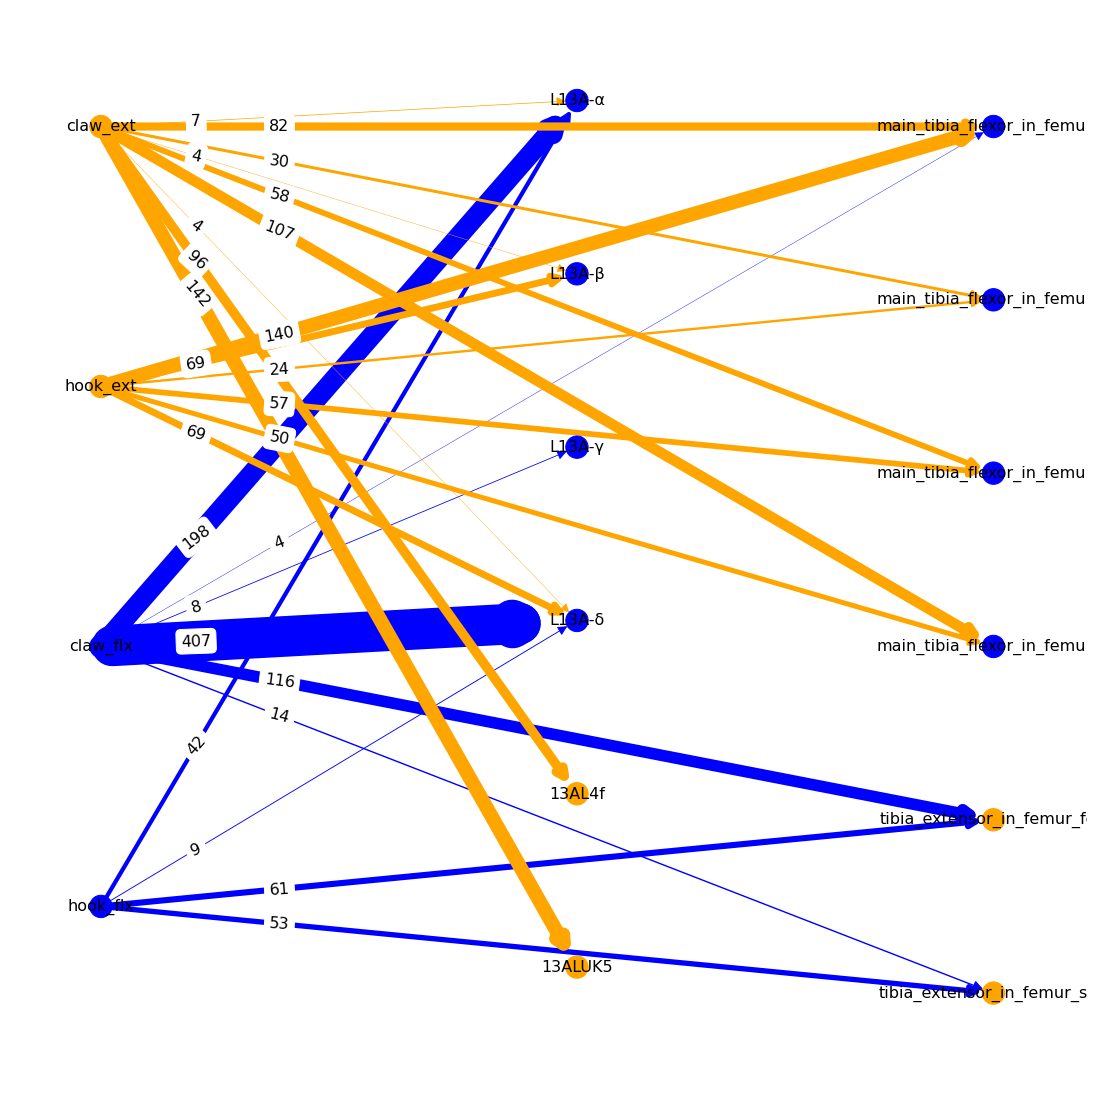

In [31]:
#PROPRIOCEPTIVE FEEDBACK (based on conenctions on left side)
import pandas as pd   # 11-1-24
import networkx as nx
import matplotlib.pyplot as plt

# Read in the tables for feco to 13A and feco to MN connections
#df_feco = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/feco/ti/feco_DTi13A2.csv')
df_feco = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/Fig3D_ii_feco (PROPRIOCEPTIVE)_DOWNSTREAM13A_TIBIA.csv')

#df_feco_MN = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/feco/ti/feco_DTiMN.csv')
df_feco_MN = pd.read_csv('/Users/Syed/Desktop/pri13AL_circuit/Fig 3D_i_feco (PROPRIOCEPTIVE)_DOWNSTREAM TIBIA MOTOR NEURONS.csv')

# Aggregate weights for each unique pair of feco → 13A and feco → MN
df_feco_agg = df_feco.groupby(['feco', '13A']).sum().reset_index()
df_feco_MN_agg = df_feco_MN.groupby(['feco', 'MN']).sum().reset_index()

# Create the graph
G = nx.DiGraph()

# Get unique motor neuron, 13A neuron, and feco neuron names
motor_neuron_names = df_feco_MN['MN'].unique().tolist()
neuron_13A_names = df_feco['13A'].unique().tolist()
neuron_feco_names = df_feco['feco'].unique().tolist()


# Specify the order of 13A neurons as per the desired arrangement
ordered_13A_names = ["L13A-α", "L13A-β", "L13A-γ", "L13A-δ", "13AL4f", "13ALUK5"]
# Define node positions
pos = {}
pos.update((node, (2.5, -i)) for i, node in enumerate(sorted(motor_neuron_names))) 

# Shift 13A nodes slightly downward by increasing the y-coordinate
#pos.update((node, (1.5, -i - 0.5)) for i, node in enumerate(sorted(neuron_13A_names)))
# Update the positions for 13A neurons based on this specific order
pos.update((node, (1.8, -i+0.15)) for i, node in enumerate(ordered_13A_names))

# Manually set the position of feco nodes based on the specified order
ordered_feco_names = ["claw_ext", "hook_ext", "claw_flx", "hook_flx"]
feco_pos = {name: (1, -i *1.5) for i, name in enumerate(ordered_feco_names)}
pos.update(feco_pos)

# Define a dictionary of colors for feco, 13A, and motor neurons
colors_13A = {
    "13AL4b": "Thistle",
    "13AL4c": "Thistle",
    "13AL4f": "orange",
    "13ALUK5": "orange",
    "L13A-γ": "blue",
    "L13A-δ": "blue",
    "L13A-α": "blue",
    "L13A-β": "blue",
    # ... (add other 13A colors here)
}

feco_colors = {
    "claw_flx": "blue",
    "hook_flx": "blue",
    "claw_ext": "orange",
    "hook_ext": "orange",
}

motor_neuron_colors = {
    "extracoxal_trochanter_depressor_in_thorax_Vn": "orange",
    "tergopleural_promotor_pleural_promotor_in_thorax_miller_28_30": "orange",
    "main_tibia_flexor_in_femur_0": "blue",
    "main_tibia_flexor_in_femur_1": "blue",
    "main_tibia_flexor_in_femur_2": "blue",
    "main_tibia_flexor_in_femur_3": "blue",
    "main_tibia_flexor_in_femur_4": "blue",
    "tibia_extensor_in_femur_seti": "orange",
    "tibia_extensor_in_femur_feti": "orange",
    # ... (add other motor neuron colors here)
}

# Add nodes to the graph
G.add_nodes_from(motor_neuron_names, bipartite=1)
G.add_nodes_from(neuron_13A_names, bipartite=2)
G.add_nodes_from(neuron_feco_names, bipartite=0)






# Add edges for connections between feco neurons and 13A neurons
for index, row in df_feco_agg.iterrows():
    feco = row['feco']
    neuron_13A = row['13A']
    weight_feco = row['weight']
    if weight_feco != 0:
        G.add_edge(feco, neuron_13A, weight=weight_feco, group='feco', color=feco_colors.get(feco, "gray"))

# Add edges for connections between feco neurons and motor neurons
for index, row in df_feco_MN_agg.iterrows():
    feco = row['feco']
    motor_neuron = row['MN']
    weight_feco = row['weight']
    if weight_feco != 0:
        G.add_edge(feco, motor_neuron, weight=weight_feco, group='feco_to_MN', color=feco_colors.get(feco, "gray"))

# Define edge colors and widths
edge_colors = []
edge_widths = []
edge_labels = {}
default_color = "gray"  # Define a fallback color for feco nodes

for u, v, data in G.edges(data=True):
    color = data.get('color', default_color)
    width = data['weight']
    edge_colors.append(color)
    edge_widths.append(width)  # Adjust width scaling as needed
    edge_labels[(u, v)] = f"{data['weight']}"  # Add edge label showing the weight


edge_widths = [w*0.1 for w in edge_widths]

node_colors = [
    motor_neuron_colors.get(node, "gray") for node in motor_neuron_names
] + [
    colors_13A.get(node, "gray") for node in neuron_13A_names
] + [
    feco_colors.get(node, "gray") for node in neuron_feco_names
]


# Draw the graph
nx.draw(
    G, pos=pos, with_labels=True, font_size=16, node_size=500, node_color=node_colors,
    edge_color=edge_colors, width=edge_widths, arrowsize=20
)

# Add edge labels for the number of synapses, closer to the postsynaptic nodes
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=16, label_pos=0.8)

# Set figure size and display the plot
plt.gcf().set_size_inches(15, 15)
plt.show()
